![Alt text](https://cdn.pixabay.com/photo/2017/08/25/05/30/in-rice-field-2679153_960_720.jpg "Rice")

# Global Rice Production in the Context of Climate Change and Food Security
### Introduction
*Rice is one of the world's most critical staple foods, providing a primary source of calories for a vast portion of the global population. The cultivation of rice is intricately linked with climate change; it is a significant contributor to greenhouse gas emissions while also being highly susceptible to the impacts of a changing climate. This reciprocal relationship poses a substantial threat to the food security of billions who depend on this essential grain. Disruptions to rice harvests can trigger significant consequences for the global food trade, affecting international supply chains and the economies of both exporting and importing nations.*

*This report will analyze three distinct global datasets to explore these interconnected challenges. By integrating country-level data on rice production, general national statistics, and food security metrics, we can identify the world's key rice-producing and consuming nations. The primary objective is to investigate the vulnerabilities of these countries to climate-related disruptions in rice availability. This will be achieved by examining their rice production metrics, such as yield and acreage, alongside their specific food security scores related to affordability, availability, and adaptation to climate change. Ultimately, this analysis seeks to highlight the broader implications for the overall food security of these nations in the face of a changing global climate.*

1. https://www.nytimes.com/interactive/2023/05/20/climate/rice-farming-climate-change.html
2. https://www.irri.org/our-work/impact-challenges/climate-change-sustainability
3. https://ricenewstoday.com/with-record-breaking-march-heat-how-climate-change-impacts-indias-rice-wheat-production-explained/
4. https://timesofindia.indiatimes.com/business/india-business/wheat-export-ban-indias-extreme-heat-wave-is-having-ripple-effects-on-worlds-food-supply/articleshow/91594379.cms
5. https://www.sciencedirect.com/science/article/abs/pii/B9780123876898000047

### Key Questions for Analysis
Research Questions: 
* *What is the profile of a top rice-producing nation?*
* *Is there a significant correlation between a country's rice yield and its overall food security?*
* *For countries with high rice production per capita, is food security more strongly linked to "Availability" or "Affordability"?*

#### Datasets to use
These datasets from kaggle will be used for analysis.
* https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023
* https://www.kaggle.com/datasets/shahriarkabir/global-rice-production-statistics-dataset
* https://www.kaggle.com/datasets/rahuljangam/global-food-security-index


## Learn Python for Data Science Portfolio Project
This Jupyter notebook is created and the analysis are done as a portfolio project for the Codecademy Python for Data Science learning path. 
The objective is to use Python and pandas to create a data science project to add to your portfolio.

#### Project Objectives:
* Create a project for a data science portfolio
* Use pandas to clean and prepare data for exploration and analysis
* Apply aggregation, merges, and other data science techniques to answer data questions
* Report key findings

#### Prerequisites:
* Python
* pandas
* Jupyter Notebook

#### Data
The data will be directly loaded in Jupyter Notebook from Kaggle.
In order to do this, the following steps must be taken
1. Get an API Token on your personal Kaggle account through the profile > settings > Create New API Token. a json file will be downloaded and move it a specific folder. for windows C:\Users\YourUsername\.kaggle\
2. Install the 'kaggle' and kagglehub Python packages
3. Get the Dataset's Kaggle API command: This should be in the downloadoption, just above the download zip. Copy the API and load the files.

The necessary other packages must also be installed
- pandas for analysis, numpy for correlation
- geopandas, geodatasets, plotly, zipfile for creating maps
- matplotlib for graphs

In [1]:
#install kaggle, kagglehub
!pip install kaggle kagglehub --upgrade

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#install necessary libraries
!pip install geopandas geodatasets matplotlib pandas zipfile plotly --upgrade

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [3]:
#import the necessary libraries
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import zipfile
import os
import kaggle
import kagglehub
import plotly.express as px

In [4]:
#Get Kaggle API token & upload to Jupyter Notebook Environment
path = "C:\\Users\\tkram\\.kaggle\\kaggle.json"

In [5]:
#Check if the file is in the right place 
print(os.path.exists("C:/Users/tkram/.kaggle/kaggle.json"))  # Should return True

True


## Exploratory Data Analysis
The first step is to examine the datasets, clean the data and check for missing values. 

### Global Rice Production Statistics Dataset
Global Rice Production: Statistics, Acreage, Yield, and Consumption Analysis. The dataframe is named **rice**.

In [6]:
# Download latest version
path = kagglehub.dataset_download("shahriarkabir/global-rice-production-statistics-dataset")
print("Path to dataset files:", path)

#check which files are in the path
print(os.listdir(path))

Path to dataset files: C:\Users\tkram\.cache\kagglehub\datasets\shahriarkabir\global-rice-production-statistics-dataset\versions\1
['rice_production_by_country.csv']


In [7]:
#Create the dataframe for dataset
rc = os.path.join(path, "rice_production_by_country.csv")  
rice = pd.read_csv(rc)
rice.head()

Country Rice Production (Tons)  Rank of Rice Production  \
0       Chile                 174.9K                     65.0   
1  Mauritania                 383.0K                     50.0   
2      Turkey                   1.0M                     40.0   
3  Kyrgyzstan                  41.2K                     87.0   
4        Laos                   3.4M                     21.0   

  Rice Production Per Person (Kg)  Rank of Rice Production Per Person  \
0                            10.0                                  76   
1                            96.1                                  26   
2                            12.4                                  68   
3                             6.5                                  81   
4                           493.9                                   3   

  Rice Acreage (Hectare)  Rank of Rice Acreage Rice Yield (Kg / Hectare)  \
0                  26.2K                  77.0                   6,664.8   
1                  73.0K                  63.0                   5,249.2   
2                 126.4K                  52.0                   7,910.2   
3                  11.3K                  89.0                   3,646.4   
4                 783.8K                  23.0                   4,386.5   

   Rank of Rice Yield  
0                16.0  
1                36.0  
2                 7.0  
3                63.0  
4                49.0

In [8]:
print("Inspect the columns:")
rice.info()

Inspect the columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             119 non-null    object 
 1   Rice Production (Tons)              119 non-null    object 
 2   Rank of Rice Production             118 non-null    float64
 3   Rice Production Per Person (Kg)     119 non-null    object 
 4   Rank of Rice Production Per Person  119 non-null    int64  
 5   Rice Acreage (Hectare)              119 non-null    object 
 6   Rank of Rice Acreage                118 non-null    float64
 7   Rice Yield (Kg / Hectare)           119 non-null    object 
 8   Rank of Rice Yield                  118 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 8.5+ KB


It seems the Rice Production in Tons is an object caused by the M/K suffix in the data. We'll have to clean this data if we want to perform analysis for this. We can use a function for this. 

In [9]:
def convert_to_numeric(value):
    if pd.isna(value):  # Handle NaN values
        return np.nan
    value = str(value).strip().upper() # ensure consistent casing
    
    if value.endswith('M'):
        return float(value[:-1]) * 1000000 #[-1] because of the suffic
    elif value.endswith('K'):
        return float(value[:-1]) * 1000
    elif value.endswith('B'):
        return float(value[:-1]) * 1000000000
    else:
        try:
            return float(value)
        except ValueError:
            return np.nan # Return NaN for values that can't be converted

In [10]:
# We'll name the converted colum rice_prod
rice['rice_prod'] = rice['Rice Production (Tons)'].apply(convert_to_numeric)

In [11]:
rice['Rice Production Per Person (Kg)'] = rice['Rice Production Per Person (Kg)'].str.replace(",", "")

In [12]:
rice['Rice Production Per Person (Kg)'] = rice['Rice Production Per Person (Kg)'].astype(float)

In [13]:
rice['Rice Yield (Kg / Hectare)'] = rice['Rice Yield (Kg / Hectare)'].str.replace(",", "")

In [14]:
rice['Rice Yield (Kg / Hectare)'] = rice['Rice Yield (Kg / Hectare)'].astype(float)
rice.head()

Country Rice Production (Tons)  Rank of Rice Production  \
0       Chile                 174.9K                     65.0   
1  Mauritania                 383.0K                     50.0   
2      Turkey                   1.0M                     40.0   
3  Kyrgyzstan                  41.2K                     87.0   
4        Laos                   3.4M                     21.0   

   Rice Production Per Person (Kg)  Rank of Rice Production Per Person  \
0                             10.0                                  76   
1                             96.1                                  26   
2                             12.4                                  68   
3                              6.5                                  81   
4                            493.9                                   3   

  Rice Acreage (Hectare)  Rank of Rice Acreage  Rice Yield (Kg / Hectare)  \
0                  26.2K                  77.0                     6664.8   
1                  73.0K                  63.0                     5249.2   
2                 126.4K                  52.0                     7910.2   
3                  11.3K                  89.0                     3646.4   
4                 783.8K                  23.0                     4386.5   

   Rank of Rice Yield  rice_prod  
0                16.0   174900.0  
1                36.0   383000.0  
2                 7.0  1000000.0  
3                63.0    41200.0  
4                49.0  3400000.0

In [15]:
rice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             119 non-null    object 
 1   Rice Production (Tons)              119 non-null    object 
 2   Rank of Rice Production             118 non-null    float64
 3   Rice Production Per Person (Kg)     119 non-null    float64
 4   Rank of Rice Production Per Person  119 non-null    int64  
 5   Rice Acreage (Hectare)              119 non-null    object 
 6   Rank of Rice Acreage                118 non-null    float64
 7   Rice Yield (Kg / Hectare)           119 non-null    float64
 8   Rank of Rice Yield                  118 non-null    float64
 9   rice_prod                           119 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 9.4+ KB


In [16]:
# the rice production (rice_prod) is now a nice float value. we can check the other stats like min, max, median using describe()
rice.describe()

Rank of Rice Production  Rice Production Per Person (Kg)  \
count               118.000000                       119.000000   
mean                 59.500000                        79.723025   
std                  34.207699                       167.820904   
min                   1.000000                         0.010000   
25%                  30.250000                         2.950000   
50%                  59.500000                        18.900000   
75%                  88.750000                        75.050000   
max                 118.000000                      1342.300000   

       Rank of Rice Production Per Person  Rank of Rice Acreage  \
count                          119.000000            118.000000   
mean                            60.000000             59.500000   
std                             34.496377             34.207699   
min                              1.000000              1.000000   
25%                             30.500000             30.250000   
50%                             60.000000             59.500000   
75%                             89.500000             88.750000   
max                            119.000000            118.000000   

       Rice Yield (Kg / Hectare)  Rank of Rice Yield     rice_prod  
count                 119.000000          118.000000  1.190000e+02  
mean                 4032.328571           59.500000  6.364525e+06  
std                  2179.091679           34.207699  2.635470e+07  
min                    59.900000            1.000000  1.000000e+00  
25%                  2411.900000           30.250000  3.750000e+04  
50%                  3795.700000           59.500000  2.743000e+05  
75%                  5600.200000           88.750000  1.650000e+06  
max                  8771.000000          118.000000  2.114000e+08

There are 119 rice producing countries, ranked from 1-118 in production, with 1 missing value. 

### Countries of the World 2023
The dataframe for this https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023 dataset will be named **countries_23**.

In [17]:
#Use the Kaggle API to Download a Dataset
# Countries of the World 2023

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/countries-of-the-world-2023")
print("Path to dataset files:", path)

#check which files are in the path
print(os.listdir(path))

Path to dataset files: C:\Users\tkram\.cache\kagglehub\datasets\nelgiriyewithana\countries-of-the-world-2023\versions\1
['world-data-2023.csv']


In [18]:
#Create the dataframe for dataset
c_w_23 = os.path.join(path, "world-data-2023.csv")  # replace with actual filename
countries_23 = pd.read_csv(c_w_23)
countries_23.head()

Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0  Afghanistan               60           AF                58.10%   
1      Albania              105           AL                43.10%   
2      Algeria               18           DZ                17.40%   
3      Andorra              164           AD                40.00%   
4       Angola               26           AO                47.50%   

  Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
0        652,230           323,000       32.49          93.0   
1         28,748             9,000       11.78         355.0   
2      2,381,741           317,000       24.28         213.0   
3            468               NaN        7.20         376.0   
4      1,246,700           117,000       40.73         244.0   

  Capital/Major City Co2-Emissions  ... Out of pocket health expenditure  \
0              Kabul         8,672  ...                           78.40%   
1             Tirana         4,536  ...                           56.90%   
2            Algiers       150,006  ...                           28.10%   
3   Andorra la Vella           469  ...                           36.40%   
4             Luanda        34,693  ...                           33.40%   

  Physicians per thousand  Population  \
0                    0.28  38,041,754   
1                    1.20   2,854,191   
2                    1.72  43,053,054   
3                    3.33      77,142   
4                    0.21  31,825,295   

   Population: Labor force participation (%) Tax revenue (%) Total tax rate  \
0                                     48.90%           9.30%         71.40%   
1                                     55.70%          18.60%         36.60%   
2                                     41.20%          37.20%         66.10%   
3                                        NaN             NaN            NaN   
4                                     77.50%           9.20%         49.10%   

  Unemployment rate Urban_population   Latitude  Longitude  
0            11.12%        9,797,273  33.939110  67.709953  
1            12.33%        1,747,593  41.153332  20.168331  
2            11.70%       31,510,100  28.033886   1.659626  
3               NaN           67,873  42.506285   1.521801  
4             6.89%       21,061,025 -11.202692  17.873887  

[5 rows x 35 columns]

This dataset contains demographic information for the countries such as population size, agricultural land, GDP. We can further inspect the data with info and describe. 

In [19]:
countries_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [20]:
countries_23.GDP

0       $19,101,353,833 
1       $15,278,077,447 
2      $169,988,236,398 
3        $3,154,057,987 
4       $94,635,415,870 
             ...        
190    $482,359,318,768 
191    $261,921,244,843 
192     $26,914,402,224 
193     $23,064,722,446 
194     $21,440,758,800 
Name: GDP, Length: 195, dtype: object

In [21]:
countries_23.Population

0      38,041,754
1       2,854,191
2      43,053,054
3          77,142
4      31,825,295
          ...    
190    28,515,829
191    96,462,106
192    29,161,922
193    17,861,030
194    14,645,468
Name: Population, Length: 195, dtype: object

It seems agricultural land, population and GPD are object values. GDP has a $ at the beginning, agricultural land has a %. Population has commas. We will have to clean the data in order to perform analysis.

In [22]:
countries_23['GDP'] = countries_23['GDP'].str.replace("$", "").str.replace(",", "")

In [23]:
countries_23['Agricultural Land( %)'] = countries_23['Agricultural Land( %)'].str.replace("%", "").str.replace(",", "")

In [24]:
countries_23['Agricultural Land( %)'] = countries_23['Agricultural Land( %)'].astype(float)

In [25]:
countries_23['Population'] = countries_23['Population'].str.replace(",", "")

In [26]:
countries_23['Population'] = countries_23['Population'].astype(float)

In [27]:
countries_23.GDP = countries_23['GDP'].astype(float)
#countries_23.info() #check if correctly applied

In [28]:
countries_23.describe()

Agricultural Land( %)  Birth Rate  Calling Code  Fertility Rate  \
count             188.000000  189.000000    194.000000      188.000000   
mean               39.117553   20.214974    360.546392        2.698138   
std                21.783052    9.945774    323.236419        1.282267   
min                 0.600000    5.900000      1.000000        0.980000   
25%                21.700000   11.300000     82.500000        1.705000   
50%                39.600000   17.950000    255.500000        2.245000   
75%                55.375000   28.750000    506.750000        3.597500   
max                82.600000   46.080000   1876.000000        6.910000   

                GDP  Infant mortality  Life expectancy  \
count  1.930000e+02        189.000000       187.000000   
mean   4.772959e+11         21.332804        72.279679   
std    2.172173e+12         19.548058         7.483661   
min    4.727146e+07          1.400000        52.800000   
25%    8.454620e+09          6.000000        67.000000   
50%    3.438723e+10         14.000000        73.200000   
75%    2.340940e+11         32.700000        77.500000   
max    2.142770e+13         84.500000        85.400000   

       Maternal mortality ratio  Physicians per thousand    Population  \
count                181.000000               188.000000  1.940000e+02   
mean                 160.392265                 1.839840  3.938116e+07   
std                  233.502024                 1.684261  1.450924e+08   
min                    2.000000                 0.010000  8.360000e+02   
25%                   13.000000                 0.332500  1.962678e+06   
50%                   53.000000                 1.460000  8.826588e+06   
75%                  186.000000                 2.935000  2.858549e+07   
max                 1150.000000                 8.420000  1.397715e+09   

         Latitude   Longitude  
count  194.000000  194.000000  
mean    19.092351   20.232434  
std     23.961779   66.716110  
min    -40.900557 -175.198242  
25%      4.544175   -7.941496  
50%     17.273849   20.972652  
75%     40.124603   48.281523  
max     64.963051  178.065032

There are 195 countries in the countries_23 dataset with several missing values for demographic data. 

### Global Food Security Index

The last dataset is the global food security index. There are 2 datasets, one for 2019 and one for 2022. Both can be useful to see if countries do better/worse. one will be named **fsec19**, the other **fsec22**.

In [29]:
# Download latest version
path = kagglehub.dataset_download("rahuljangam/global-food-security-index")

print("Path to dataset files:", path)

#check which files are in the path
print(os.listdir(path))

Path to dataset files: C:\Users\tkram\.cache\kagglehub\datasets\rahuljangam\global-food-security-index\versions\1
['Global Food Security Index 2019.csv', 'Global Food Security Index 2022.csv']


In [30]:
#Create the dataframe for dataset
fs19 = os.path.join(path, "Global Food Security Index 2019.csv")  
fsec19= pd.read_csv(fs19)
fsec19.head()

Unnamed: 0       0              1              2              3  \
0           0  No [7]        Country  Overall Score  Affordability   
1           1     1st      Singapore           87.4           95.4   
2           2     2nd        Ireland           84.0           90.5   
3           3     3rd  United States           83.7           87.4   
4           4     4th    Switzerland           83.1           83.8   

              4                 5  
0  Availability  Quality & safety  
1          83.0              79.4  
2          76.8              87.7  
3          78.3              89.1  
4          84.3              78.2

In [31]:
# The header seems to be the second row. We need to update the code.
fsec19= pd.read_csv(fs19, header=1)
fsec19.head()

0 No [7]        Country  Overall Score  Affordability  Availability  \
0  1    1st      Singapore           87.4           95.4          83.0   
1  2    2nd        Ireland           84.0           90.5          76.8   
2  3    3rd  United States           83.7           87.4          78.3   
3  4    4th    Switzerland           83.1           83.8          84.3   
4  5   =5th        Finland           82.9           84.1          78.6   

   Quality & safety  
0              79.4  
1              87.7  
2              89.1  
3              78.2  
4              91.8

In [32]:
print("Inspect the columns:")
fsec19.info()

Inspect the columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   0                 113 non-null    int64  
 1   No [7]            113 non-null    object 
 2   Country           113 non-null    object 
 3   Overall Score     113 non-null    float64
 4   Affordability     113 non-null    float64
 5   Availability      113 non-null    float64
 6   Quality & safety  113 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 6.3+ KB


In [33]:
#Create the dataframe for dataset
fs22= os.path.join(path, "Global Food Security Index 2022.csv")  
fsec22= pd.read_csv(fs22)
fsec22.head()

Unnamed: 0 Rank      Country  Overall score  Affordability  Availability  \
0           0  1st      Finland           83.7           91.9          70.5   
1           1  2nd      Ireland           81.7           92.6          70.5   
2           2  3rd       Norway           80.5           87.2          60.4   
3           3  4th       France           80.2           91.3          69.0   
4           4  5th  Netherlands           80.1           92.7          70.7   

   Quality and Safety  Sustainability and Adaptation  
0                88.4                           82.6  
1                86.1                           75.1  
2                86.8                           87.4  
3                87.7                           70.3  
4                84.7                           69.2

In [34]:
print("Inspect the columns:")
fsec22.info()

Inspect the columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     113 non-null    int64  
 1   Rank                           113 non-null    object 
 2   Country                        113 non-null    object 
 3   Overall score                  113 non-null    float64
 4   Affordability                  113 non-null    float64
 5   Availability                   113 non-null    float64
 6   Quality and Safety             113 non-null    float64
 7   Sustainability and Adaptation  113 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 7.2+ KB


In [35]:
# this is to create a world map where are the production is visualised per country
# Set paths
zip_path = 'ne_110m_admin_0_countries.zip'  # name of the uploaded ZIP
extract_dir = './shapefile_extracted'

# Create extract directory
os.makedirs(extract_dir, exist_ok=True)

# Extract the ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Find the .shp file
shp_file = [f for f in os.listdir(extract_dir) if f.endswith('.shp')][0]
shp_path = os.path.join(extract_dir, shp_file)

# Load the shapefile
world = gpd.read_file(shp_path)

# Preview
world.head()

featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL FCLASS_GR  FCLASS_IT  \
0          None          None          None      None       None   
1          None          None          None      None       None   
2  Unrecognized  Unrecognized  Unrecognized      None       None   
3          None          None          None      None       None   
4          None          None          None      None       None   

      FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
0          None      None       None      None   
1          None      None       None      None   
2  Unrecognized      None       None      None   
3          None      None       None      None   
4          None      None       None      None   

                                            geometry  
0  MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...  
1  POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...  
4  MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...  

[5 rows x 169 columns]

In [36]:
print("World GeoDataFrame country column:", world.columns)
print("Kaggle DataFrame columns:", rice.columns)

World GeoDataFrame country column: Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)
Kaggle DataFrame columns: Index(['Country', 'Rice Production (Tons)', 'Rank of Rice Production',
       'Rice Production Per Person (Kg)', 'Rank of Rice Production Per Person',
       'Rice Acreage (Hectare)', 'Rank of Rice Acreage',
       'Rice Yield (Kg / Hectare)', 'Rank of Rice Yield', 'rice_prod'],
      dtype='object')


In [37]:
rice_world = rice.rename(columns={   
    'Country': 'ADMIN',
    'rice_prod': 'Production'
})

rice_world.head()

ADMIN Rice Production (Tons)  Rank of Rice Production  \
0       Chile                 174.9K                     65.0   
1  Mauritania                 383.0K                     50.0   
2      Turkey                   1.0M                     40.0   
3  Kyrgyzstan                  41.2K                     87.0   
4        Laos                   3.4M                     21.0   

   Rice Production Per Person (Kg)  Rank of Rice Production Per Person  \
0                             10.0                                  76   
1                             96.1                                  26   
2                             12.4                                  68   
3                              6.5                                  81   
4                            493.9                                   3   

  Rice Acreage (Hectare)  Rank of Rice Acreage  Rice Yield (Kg / Hectare)  \
0                  26.2K                  77.0                     6664.8   
1                  73.0K                  63.0                     5249.2   
2                 126.4K                  52.0                     7910.2   
3                  11.3K                  89.0                     3646.4   
4                 783.8K                  23.0                     4386.5   

   Rank of Rice Yield  Production  
0                16.0    174900.0  
1                36.0    383000.0  
2                 7.0   1000000.0  
3                63.0     41200.0  
4                49.0   3400000.0

In [38]:
rice_world['ADMIN'].isin(world['ADMIN']).value_counts()  # if they are named the same the count should be 119

ADMIN
True     109
False     10
Name: count, dtype: int64

In [39]:
# The differences seems to be mostly in the rice dataset. We can use a function to check where the differences are. 
def check_country(df1, df2, col1, col2):
    """This function check if two paired elements are present in two different dataframes.
        It returns 2 lists.
        - countries from df1 that are not in df2. 
        - countries in df2 not matched with df1. """
    
    set1 = set(df1[col1].dropna().unique())
    set2 = set(df2[col2].dropna().unique())
    df1_not_in_df2 = []
    
    # 1. Values in df1[col1] that are not in df2[col2]
    df1_not_in_df2 = list(set1 - set2) # Set difference operation

    # 2. Values in df2[col2] that are not in df1[col1]
    df2_no_match = list(set2 - set1) # Set difference operation
        
    print(f"These countries are not in the second dataframe: {sorted(df1_not_in_df2)}")
    print("")
    print(f"These countries from the second dataframe don't match with the first dataframe: {sorted(df2_no_match)}")

In [40]:
check_country(rice_world, world, 'ADMIN', 'ADMIN')

These countries are not in the second dataframe: ['Comoros', 'DR Congo', 'Eswatini', 'Guinea Bissau', 'Mauritius', 'Micronesia', 'Saint Vincent and the Grenadines', 'Tanzania', 'Timor Leste', 'United States']

These countries from the second dataframe don't match with the first dataframe: ['Antarctica', 'Armenia', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Botswana', 'Canada', 'Croatia', 'Cyprus', 'Czechia', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'East Timor', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Falkland Islands', 'Finland', 'French Southern and Antarctic Lands', 'Georgia', 'Germany', 'Greenland', 'Guinea-Bissau', 'Iceland', 'Ireland', 'Israel', 'Jordan', 'Kosovo', 'Kuwait', 'Latvia', 'Lebanon', 'Lesotho', 'Libya', 'Lithuania', 'Luxembourg', 'Moldova', 'Mongolia', 'Montenegro', 'Namibia', 'Netherlands', 'New Caledonia', 'New Zealand', 'Northern Cyprus', 'Norway', 'Oman', 'Palestine', 'Poland', 'Puerto Rico', 'Qatar', 'Republic of Serbia', 'S

In [41]:
# 'Comoros', 'Federated States of Micronesia', 'Mauritius', 'Saint Vincent and the Grenadines' are not in the world map. The other ones are under another name, so we need to rename them to match.

rw_new = {
    'Eswatini' : 'eSwatini',
    'Tanzania' : 'United Republic of Tanzania',
    'The Gambia' : 'Gambia',
    'United States' : 'United States of America' }

rice_world['ADMIN'] = rice_world['ADMIN'].replace(rw_new)

check_country(rice_world, world, 'ADMIN', 'ADMIN') # should return 4 countries with the first check

These countries are not in the second dataframe: ['Comoros', 'DR Congo', 'Guinea Bissau', 'Mauritius', 'Micronesia', 'Saint Vincent and the Grenadines', 'Timor Leste']

These countries from the second dataframe don't match with the first dataframe: ['Antarctica', 'Armenia', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Botswana', 'Canada', 'Croatia', 'Cyprus', 'Czechia', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'East Timor', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Falkland Islands', 'Finland', 'French Southern and Antarctic Lands', 'Georgia', 'Germany', 'Greenland', 'Guinea-Bissau', 'Iceland', 'Ireland', 'Israel', 'Jordan', 'Kosovo', 'Kuwait', 'Latvia', 'Lebanon', 'Lesotho', 'Libya', 'Lithuania', 'Luxembourg', 'Moldova', 'Mongolia', 'Montenegro', 'Namibia', 'Netherlands', 'New Caledonia', 'New Zealand', 'Northern Cyprus', 'Norway', 'Oman', 'Palestine', 'Poland', 'Puerto Rico', 'Qatar', 'Republic of Serbia', 'Slovakia', 'Slovenia', 'Somaliland', 'Sout

In [42]:
rice_worldmap = world.merge(rice_world, on='ADMIN', how='left')
rice_worldmap.head()

featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

                                            geometry  Rice Production (Tons)  \
0  MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...                    5.7K   
1  POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...                    3.5M   
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...                     NaN   
3  MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...                     NaN   
4  MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...                    8.4M   

  Rank of Rice Production Rice Production Per Person (Kg)  \
0                   100.0                             6.5   
1                    20.0                            64.1   
2                     NaN                             NaN   
3                     NaN                             NaN   
4                    14.0                            25.6   

   Rank of Rice Production Per Person Rice Acreage (Hectare)  \
0                                82.0                   1.9K   
1                                37.0                   1.1M   
2                                 NaN                    NaN   
3                                 NaN                    NaN   
4                                53.0                   1.0M   

  Rank of Rice Acreage  Rice Yield (Kg / Hectare) Rank of Rice Yield  \
0                103.0                     3000.0               76.0   
1                 17.0                     3301.3               72.0   
2                  NaN                        NaN                NaN   
3                  NaN                        NaN                NaN   
4                 18.0                     8373.5                3.0   

  Production  
0     5700.0  
1  3500000.0  
2        NaN  
3        NaN  
4  8400000.0  

[5 rows x 178 columns]

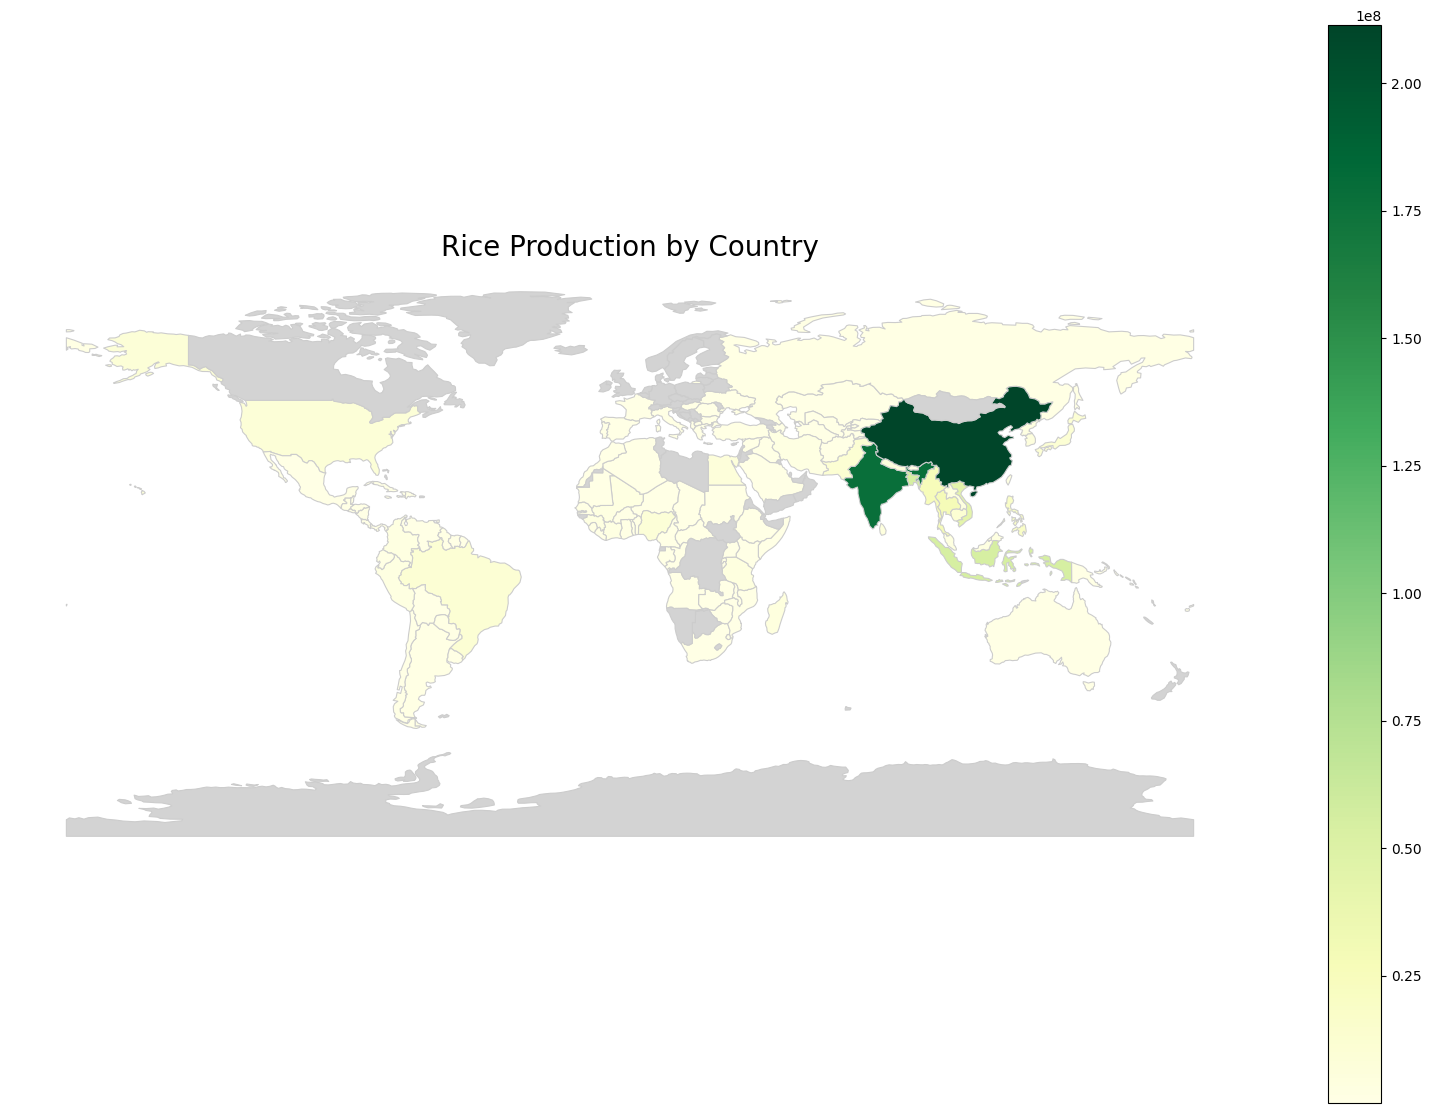

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(20, 14))
rice_worldmap.plot(
    column='Production',
    cmap='YlGn',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "label": "No data"    })

ax.set_title('Rice Production by Country', fontdict={'fontsize': 20})
ax.axis('off')
plt.show()

## What is the profile of a top rice-producing nation?

This question can be answered by identifying the top 10 countries from the global-rice-production-statistics-dataset based on rice production and then analyzing their corresponding economic and demographic characteristics (e.g., GDP, Population, Agricultural Land %) from the countries-of-the-world-2023 dataset.

We'll have to combine datasets to examine these values. After the combination we can perform further analysis for the top 10 and bottom 10 countries.
These datasets can be joined on countries. 
However we need to inspect if the countries are named the same in order to combine the datasets.

There are only 119 rice producing countries, but 195 countries in the countries_23 dataset.

In [44]:
# there are several ways to do this. 
countries_23['Country'].isin(rice['Country']).value_counts() # if they are named the same the count should be 119

Country
True     113
False     82
Name: count, dtype: int64

In [45]:
fsec22['Country'].isin(rice['Country']).value_counts() # if they are named the same the count should be 119

Country
True     82
False    31
Name: count, dtype: int64

In [46]:
# there seems to be some countries named differently between the datasets. 
fsec22['Country'].isin(countries_23['Country']).value_counts()

Country
True     110
False      3
Name: count, dtype: int64

In [47]:
# check food security and country dataset for names
check_country(fsec22, countries_23, 'Country', 'Country')

These countries are not in the second dataframe: ["Côte d'Ivoire", 'Democratic Republic of Congo', 'Ireland']

These countries from the second dataframe don't match with the first dataframe: ['Afghanistan', 'Albania', 'Andorra', 'Antigua and Barbuda', 'Armenia', 'Barbados', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Brunei', 'Cape Verde', 'Central African Republic', 'Comoros', 'Croatia', 'Cuba', 'Cyprus', 'Democratic Republic of the Congo', 'Djibouti', 'Dominica', 'East Timor', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Federated States of Micronesia', 'Fiji', 'Gabon', 'Georgia', 'Grenada', 'Guinea-Bissau', 'Guyana', 'Iceland', 'Iran', 'Iraq', 'Ivory Coast', 'Jamaica', 'Kiribati', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Namibia', 'Nauru', 'North Korea', 'North Macedonia', 'Palau', 'Pale

These countries are not in the second dataframe: ["Côte d'Ivoire", 'Democratic Republic of Congo', 'Ireland']

* Côte d'Ivoire = Ivory Coast
* Democratic Republic of Congo = Democratic Republic of the Congo
* Ireland = Republic of Ireland

We will have to change the names in the fsec22 dataset.

In [48]:
# new names for the countries
new_fsec22 = {
    "Côte d'Ivoire" : "Ivory Coast",
    "Democratic Republic of Congo" : "Democratic Republic of the Congo",
    "Ireland" : "Republic of Ireland"
}

#replace values with the renamed ones
fsec22['Country'] = fsec22['Country'].replace(new_fsec22)

#perform check again
check_country(fsec22, countries_23, 'Country', 'Country')

These countries are not in the second dataframe: []

These countries from the second dataframe don't match with the first dataframe: ['Afghanistan', 'Albania', 'Andorra', 'Antigua and Barbuda', 'Armenia', 'Barbados', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Brunei', 'Cape Verde', 'Central African Republic', 'Comoros', 'Croatia', 'Cuba', 'Cyprus', 'Djibouti', 'Dominica', 'East Timor', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Federated States of Micronesia', 'Fiji', 'Gabon', 'Georgia', 'Grenada', 'Guinea-Bissau', 'Guyana', 'Iceland', 'Iran', 'Iraq', 'Jamaica', 'Kiribati', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Namibia', 'Nauru', 'North Korea', 'North Macedonia', 'Palau', 'Palestinian National Authority', 'Papua New Guinea', 'Republic of the Congo', 'Saint Kitts and Nevis', 'Saint Luc

In [49]:
#Check matches between rice and countries_23
check_country(rice, countries_23, 'Country', 'Country')

These countries are not in the second dataframe: ['DR Congo', 'Gambia', 'Guinea Bissau', 'Micronesia', 'Taiwan', 'Timor Leste']

These countries from the second dataframe don't match with the first dataframe: ['Andorra', 'Antigua and Barbuda', 'Armenia', 'Austria', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Botswana', 'Canada', 'Cape Verde', 'Croatia', 'Cyprus', 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'East Timor', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Federated States of Micronesia', 'Finland', 'Georgia', 'Germany', 'Grenada', 'Guinea-Bissau', 'Iceland', 'Israel', 'Jordan', 'Kiribati', 'Kuwait', 'Latvia', 'Lebanon', 'Lesotho', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta', 'Marshall Islands', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Namibia', 'Nauru', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Palau', 'Palestinian National Authority', 'Poland', 'Qatar', 'Republic

###### Comparing rice to countries_23
These countries are not in the second dataframe: ['DR Congo', 'Gambia', 'Guinea Bissau', 'Micronesia', 'Taiwan', 'Timor Leste']

* DR Congo = Democratic Republic of the Congo
* Gambia = The Gambia
* Guinea Bissau = Guinea-Bissau
* Micronesia = Federated States of Micronesia
* Taiwan = not there or falls under China, this data might be off. 
* Timor Leste = East Timor

These values will have to first be renamed in the rice dataset perform a join. 

In [50]:
# new values
new_rice = {
    "DR Congo" : "Democratic Republic of the Congo", 
    "Gambia" : "The Gambia",
    "Guinea Bissau" : "Guinea-Bissau",
    "Micronesia" : "Federated States of Micronesia",
    "Timor Leste" : "East Timor",
}

# replace values
rice['Country'] = rice['Country'].replace(new_rice)

#check again
check_country(rice, countries_23, 'Country', 'Country') #only Taiwan should be left

These countries are not in the second dataframe: ['Taiwan']

These countries from the second dataframe don't match with the first dataframe: ['Andorra', 'Antigua and Barbuda', 'Armenia', 'Austria', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Botswana', 'Canada', 'Cape Verde', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Finland', 'Georgia', 'Germany', 'Grenada', 'Iceland', 'Israel', 'Jordan', 'Kiribati', 'Kuwait', 'Latvia', 'Lebanon', 'Lesotho', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta', 'Marshall Islands', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Namibia', 'Nauru', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Palau', 'Palestinian National Authority', 'Poland', 'Qatar', 'Republic of Ireland', 'Saint Kitts and Nevis', 'Saint Lucia', 'Samoa', 'San Marino', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia', 'South Sudan', 'Sweden', 'Switz

In [51]:
# check food security and rice datasets for names
check_country(rice, fsec22, 'Country', 'Country')

These countries are not in the second dataframe: ['Afghanistan', 'Albania', 'Belize', 'Bhutan', 'Brunei', 'Central African Republic', 'Comoros', 'Cuba', 'East Timor', 'Eswatini', 'Federated States of Micronesia', 'Fiji', 'Gabon', 'Guinea-Bissau', 'Guyana', 'Iran', 'Iraq', 'Jamaica', 'Kyrgyzstan', 'Liberia', 'Mauritania', 'Mauritius', 'North Korea', 'North Macedonia', 'Papua New Guinea', 'Republic of the Congo', 'Saint Vincent and the Grenadines', 'Solomon Islands', 'Somalia', 'Suriname', 'Taiwan', 'The Gambia', 'Trinidad and Tobago', 'Turkmenistan', 'Zimbabwe']

These countries from the second dataframe don't match with the first dataframe: ['Austria', 'Bahrain', 'Belarus', 'Belgium', 'Botswana', 'Canada', 'Czech Republic', 'Denmark', 'Finland', 'Germany', 'Israel', 'Jordan', 'Kuwait', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Poland', 'Qatar', 'Republic of Ireland', 'Serbia', 'Singapore', 'Slovakia', 'Sweden', 'Switzerland', 'Tunisia', 'United Arab Emirates', 'United Kingdom', 

The countries from rice with no maches in fsec22 don't appear in the fsec22 with another name. It seems that there is no data for those. 

We can use multiple combinations of the datasets, based on the needs to not lose too much data for further analysis. 


First question to answer was the What is the profile of a top rice-producing nation? (and compare it the bottom rice-producing nations). 
We can combine the rice and the countries datasets on Country. 

In [52]:
rice_countries = rice.merge(countries_23, on='Country', how='left')
rice_countries.head()

Country Rice Production (Tons)  Rank of Rice Production  \
0       Chile                 174.9K                     65.0   
1  Mauritania                 383.0K                     50.0   
2      Turkey                   1.0M                     40.0   
3  Kyrgyzstan                  41.2K                     87.0   
4        Laos                   3.4M                     21.0   

   Rice Production Per Person (Kg)  Rank of Rice Production Per Person  \
0                             10.0                                  76   
1                             96.1                                  26   
2                             12.4                                  68   
3                              6.5                                  81   
4                            493.9                                   3   

  Rice Acreage (Hectare)  Rank of Rice Acreage  Rice Yield (Kg / Hectare)  \
0                  26.2K                  77.0                     6664.8   
1                  73.0K                  63.0                     5249.2   
2                 126.4K                  52.0                     7910.2   
3                  11.3K                  89.0                     3646.4   
4                 783.8K                  23.0                     4386.5   

   Rank of Rice Yield  rice_prod  ... Out of pocket health expenditure  \
0                16.0   174900.0  ...                           32.20%   
1                36.0   383000.0  ...                           48.20%   
2                 7.0  1000000.0  ...                           16.90%   
3                63.0    41200.0  ...                           48.20%   
4                49.0  3400000.0  ...                           45.40%   

  Physicians per thousand  Population  \
0                    2.59  18952038.0   
1                    0.19   4525696.0   
2                    1.85  83429615.0   
3                    1.88   6456900.0   
4                    0.37   7169455.0   

  Population: Labor force participation (%) Tax revenue (%)  Total tax rate  \
0                                    62.60%          18.20%          34.00%   
1                                    45.90%             NaN          67.00%   
2                                    52.80%          17.90%          42.30%   
3                                    59.80%          18.00%          29.00%   
4                                    78.50%          12.90%          24.10%   

   Unemployment rate Urban_population   Latitude   Longitude  
0              7.09%       16,610,135 -35.675147  -71.542969  
1              9.55%        2,466,821  21.007890  -10.940835  
2             13.49%       63,097,818  38.963745   35.243322  
3              6.33%        2,362,644  41.204380   74.766098  
4              0.63%        2,555,552  19.856270  102.495496  

[5 rows x 44 columns]

In [53]:
rice_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    119 non-null    object 
 1   Rice Production (Tons)                     119 non-null    object 
 2   Rank of Rice Production                    118 non-null    float64
 3   Rice Production Per Person (Kg)            119 non-null    float64
 4   Rank of Rice Production Per Person         119 non-null    int64  
 5   Rice Acreage (Hectare)                     119 non-null    object 
 6   Rank of Rice Acreage                       118 non-null    float64
 7   Rice Yield (Kg / Hectare)                  119 non-null    float64
 8   Rank of Rice Yield                         118 non-null    float64
 9   rice_prod                                  119 non-null    float64
 10  Density
(P/Km2)           

We still have 119 rows, now we can create a subset with top producers and 

In [54]:
#top producers
top_rice = rice_countries[rice_countries['Rank of Rice Production'] < 11] # analyse the top 10 countries
top_rice = top_rice.sort_values(by='Rank of Rice Production')

print("These are the top rice producing countries")
top_rice

These are the top rice producing countries


Country Rice Production (Tons)  Rank of Rice Production  \
71        China                 211.4M                      1.0   
98        India                 177.6M                      2.0   
68    Indonesia                  54.6M                      3.0   
88   Bangladesh                  54.6M                      4.0   
25      Vietnam                  43.4M                      5.0   
12     Thailand                  28.4M                      6.0   
40      Myanmar                  26.3M                      7.0   
48  Philippines                  18.8M                      8.0   
95     Pakistan                  11.1M                      9.0   
14     Cambodia                  10.9M                     10.0   

    Rice Production Per Person (Kg)  Rank of Rice Production Per Person  \
71                            151.7                                  17   
98                            132.9                                  19   
68                            206.0                                  12   
88                            330.6                                   9   
25                            459.0                                   6   
12                            409.9                                   7   
40                            487.7                                   4   
48                            176.8                                  14   
95                             55.1                                  40   
14                            677.4                                   2   

   Rice Acreage (Hectare)  Rank of Rice Acreage  Rice Yield (Kg / Hectare)  \
71                  30.0M                   2.0                     7056.2   
98                  43.8M                   1.0                     4057.7   
68                  10.7M                   4.0                     5113.7   
88                  11.5M                   3.0                     4739.8   
25                   7.5M                   6.0                     5816.5   
12                   9.7M                   5.0                     2918.8   
40                   6.9M                   7.0                     3795.7   
48                   4.7M                   9.0                     4044.9   
95                   3.0M                  10.0                     3663.7   
14                   3.0M                  11.0                     3627.1   

    Rank of Rice Yield    rice_prod  ... Out of pocket health expenditure  \
71                11.0  211400000.0  ...                           32.40%   
98                56.0  177600000.0  ...                           65.10%   
68                39.0   54600000.0  ...                           48.30%   
88                44.0   54600000.0  ...                           71.80%   
25                27.0   43400000.0  ...                           43.50%   
12                80.0   28400000.0  ...                           11.80%   
40                59.0   26300000.0  ...                           73.90%   
48                57.0   18800000.0  ...                           53.50%   
95                62.0   11100000.0  ...                           66.50%   
14                64.0   10900000.0  ...                           59.40%   

   Physicians per thousand    Population  \
71                    1.98  1.397715e+09   
98                    0.86  1.366418e+09   
68                    0.43  2.702039e+08   
88                    0.58  1.673108e+08   
25                    0.82  9.646211e+07   
12                    0.81  6.962558e+07   
40                    0.68  5.404542e+07   
48                    0.60  1.081166e+08   
95                    0.98  2.165653e+08   
14                    0.17  1.648654e+07   

   Population: Labor force participation (%) Tax revenue (%)  Total tax rate  \
71                                    68.00%           9.40%          59.20%   
98                                    49.30%          11.20%          49.70%   
68          

In [55]:
bottom_rice = rice_countries[rice_countries['Rank of Rice Production'] >108 ] # rank goes from 1-119. so we need the bottom 10 countries
bottom_rice = bottom_rice.sort_values(by='Rank of Rice Production')

print("These are the bottom rice producing countries")
bottom_rice

These are the bottom rice producing countries


Country Rice Production (Tons)  \
38               Trinidad and Tobago                   1.0K   
43                  Papua New Guinea                    853   
35                           Albania                    585   
77                           Algeria                    229   
51    Federated States of Micronesia                    199   
54                             Syria                    100   
92                      Saudi Arabia                     88   
70                         Mauritius                     21   
9   Saint Vincent and the Grenadines                     11   
45                           Jamaica                      1   

    Rank of Rice Production  Rice Production Per Person (Kg)  \
38                    109.0                             0.74   
43                    110.0                             0.10   
35                    111.0                             0.20   
77                    112.0                             0.01   
51                    113.0                             1.90   
54                    114.0                             0.01   
92                    115.0                             0.01   
70                    116.0                             0.02   
9                     117.0                             0.10   
45                    118.0                             0.10   

    Rank of Rice Production Per Person Rice Acreage (Hectare)  \
38                                 106                   2.0K   
43                                 111                    406   
35                                 109                    140   
77                                 117                    115   
51                                  96                     99   
54                                 118                     20   
92                                 119                     60   
70                                 116                      6   
9                                  112                      4   
45                                 113                      1   

    Rank of Rice Acreage  Rice Yield (Kg / Hectare)  Rank of Rice Yield  \
38                 102.0                      500.0               115.0   
43                 109.0                     2101.0                90.0   
35                 111.0                     4178.6                53.0   
77                 112.0                     1991.3                92.0   
51                 113.0                     2010.1                91.0   
54                 115.0                     5000.0                40.0   
92                 114.0                     1466.7               103.0   
70                 116.0                     3500.0                66.0   
9                  117.0                     2750.0                86.0   
45                 118.0                     1000.0               110.0   

    rice_prod  ... Out of pocket health expenditure Physicians per thousand  \
38     1000.0  ...                           37.30%                    4.17   
43      853.0  ...                            5.80%                    0.07   
35      585.0  ...                           56.90%                    1.20   
77      229.0  ...                           28.10%                    1.72   
51      199.0  ...                            2.50%                    0.18   
54      100.0  ...                           53.70%                    1.22   
92       88.0  ...                           15.00%                    2.61   
70       21.0  ...                           50.70%                    2.53   
9        11.0  ...                           21.40%                    0.66   
45        1.0  ...                           23.70%                    1.31   

    Population Population: Labor force participation (%) Tax revenue (%)  \
38   1394973.0                                    60.00%          19.50%   
43   8776109.0                                    47.20%          

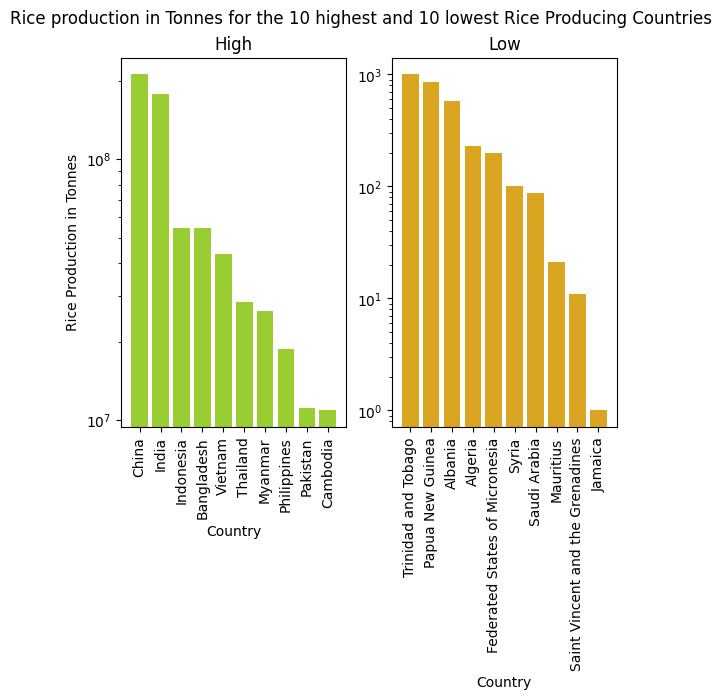

In [56]:
# visual
plt.subplot(1,2,1) # 1 row, 2 columns, first plot
plt.bar(x=top_rice['Country'], height = top_rice['rice_prod'], color='yellowgreen')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("High")
plt.xlabel("Country")
plt.ylabel("Rice Production in Tonnes")

plt.subplot(1,2,2) # 1 row, 2 columns, second plot
plt.bar(x=bottom_rice['Country'], height = bottom_rice['rice_prod'], color='goldenrod')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Low")
plt.xlabel("Country")


plt.suptitle("Rice production in Tonnes for the 10 highest and 10 lowest Rice Producing Countries")
plt.show()


The highest rice producing ocuntries are all in Asia, whereas the low producers are spread out. Jamaica with the lowest production, produces 1 Ton of rice each annually. 

We can now compare GPD, population size, agricultural land % and production for both datasets. 

In [57]:
top_rice.GDP

71    1.991000e+13
98    2.611000e+12
68    1.119191e+12
88    3.025713e+11
25    2.619212e+11
12    5.436500e+11
40    7.608585e+10
48    3.767955e+11
95    3.044000e+11
14    2.708939e+10
Name: GDP, dtype: float64

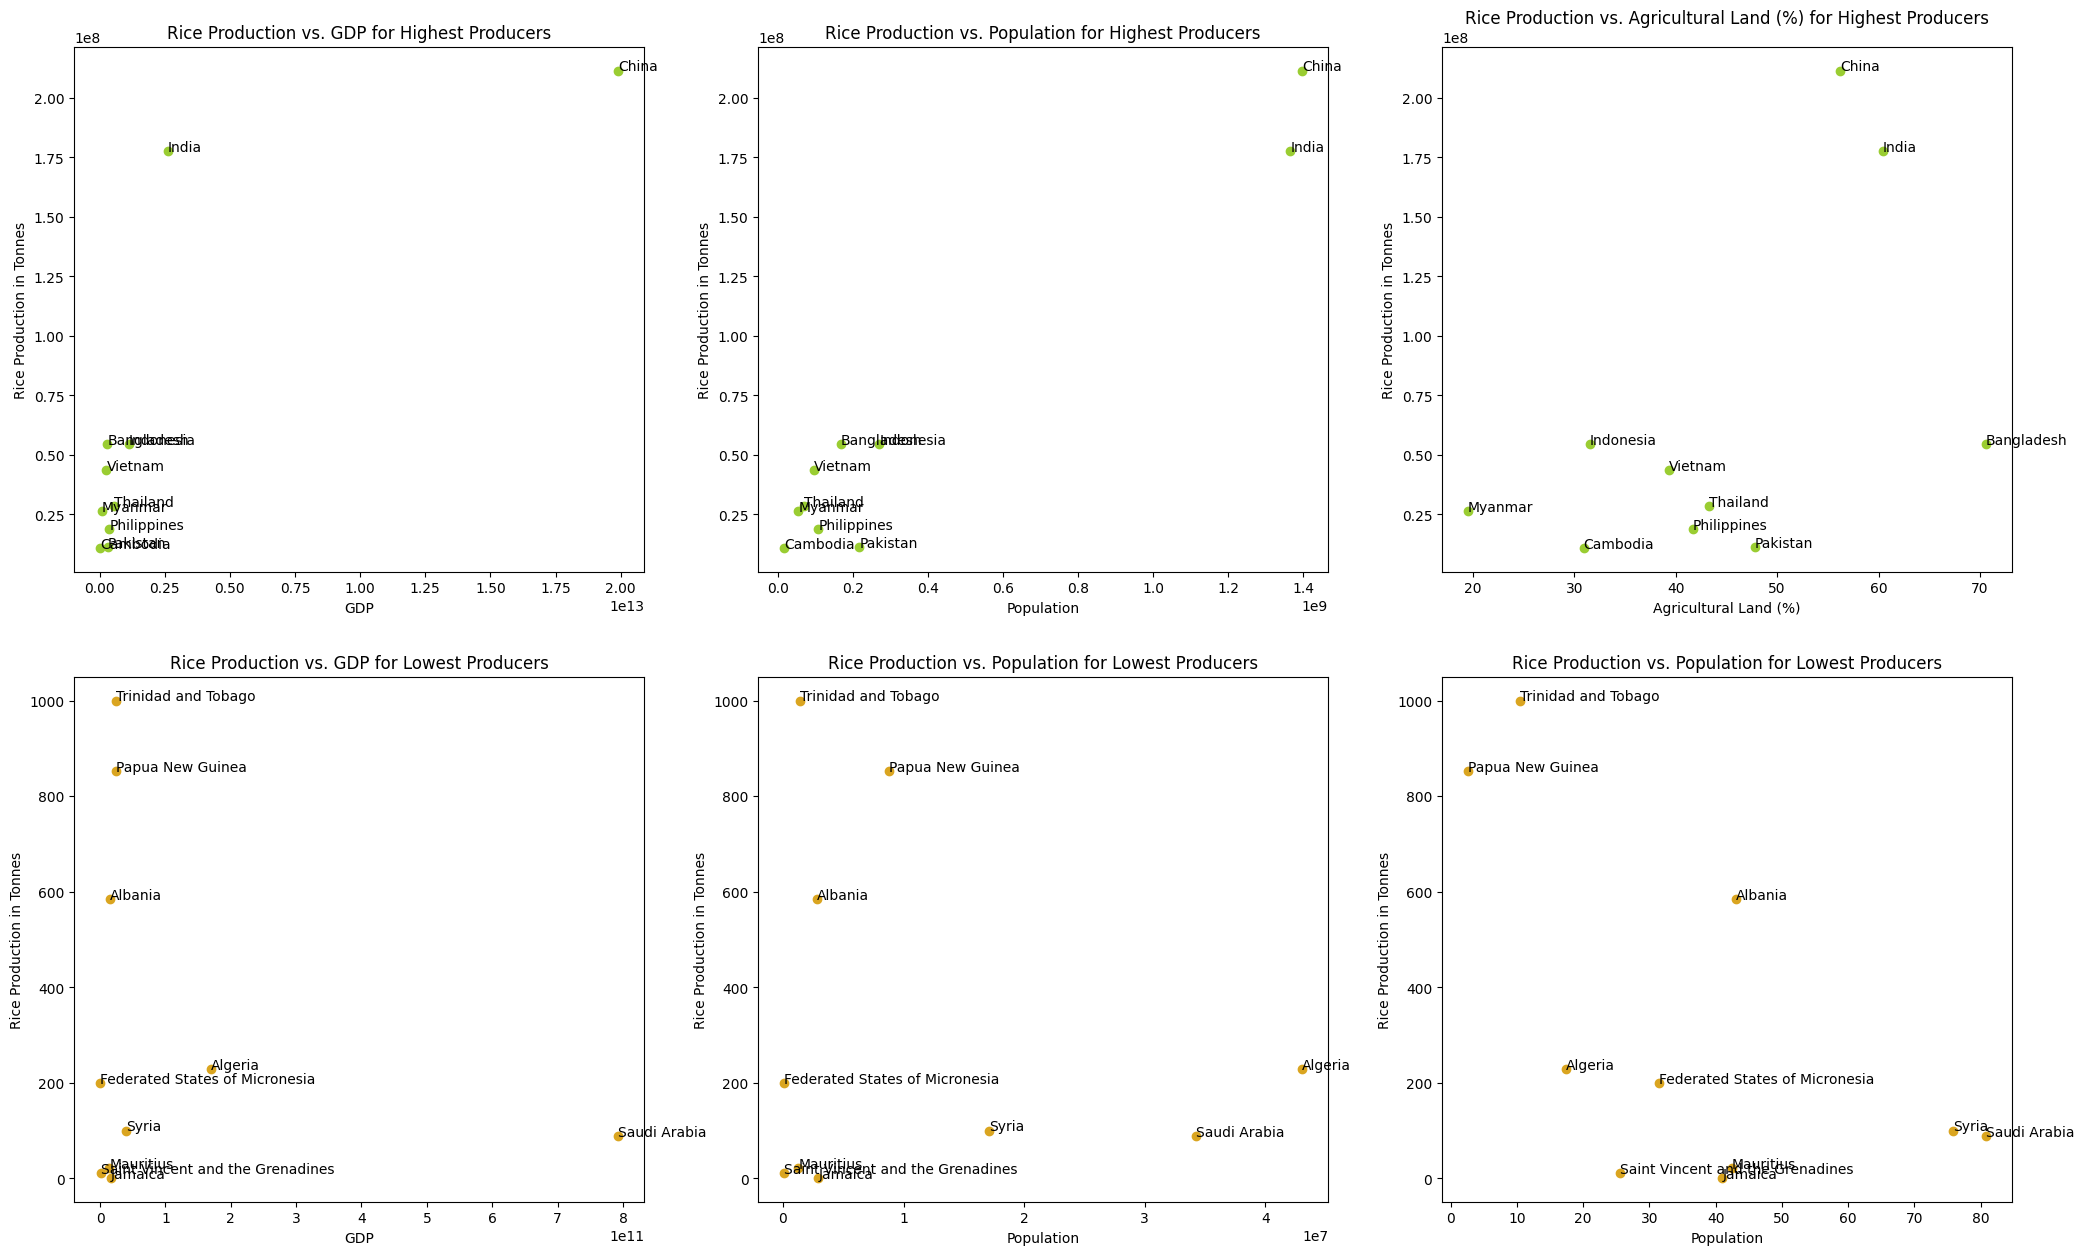

In [58]:
fig = plt.figure(figsize=(25,15))
# 2 rows, 3 figures (GPD, population, agricultural land %). row 1 = top producers, row 2 = bottom producers
ax1 = fig.add_subplot(231) # 2 rows, 3 figures, 1st figure)
ax2 = fig.add_subplot(232) # second figure
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236) 

#top
#GDP_prod
ax1.scatter(x=top_rice['GDP'], y=top_rice['rice_prod'], color='yellowgreen')
ax1.set_xlabel("GDP")
ax1.set_ylabel("Rice Production in Tonnes")
ax1.set_title("Rice Production vs. GDP for Highest Producers")               
for index, row in top_rice.iterrows():
    ax1.annotate(row['Country'], (row['GDP'], row['rice_prod']))
#population_prod
ax2.scatter(x=top_rice['Population'], y=top_rice['rice_prod'], color='yellowgreen')
ax2.set_xlabel("Population")
ax2.set_ylabel("Rice Production in Tonnes")
ax2.set_title("Rice Production vs. Population for Highest Producers")   
for index, row in top_rice.iterrows():
    ax2.annotate(row['Country'], (row['Population'], row['rice_prod']))
# agricult land_prod
ax3.scatter(x=top_rice['Agricultural Land( %)'], y=top_rice['rice_prod'], color='yellowgreen')
ax3.set_xlabel("Agricultural Land (%)")
ax3.set_ylabel("Rice Production in Tonnes")
ax3.set_title("Rice Production vs. Agricultural Land (%) for Highest Producers")   
for index, row in top_rice.iterrows():
    ax3.annotate(row['Country'], (row['Agricultural Land( %)'], row['rice_prod']))

#bottom
#GDP
ax4.scatter(x=bottom_rice['GDP'], y=bottom_rice['rice_prod'], color='goldenrod')
ax4.set_xlabel("GDP")
ax4.set_ylabel("Rice Production in Tonnes")
ax4.set_title("Rice Production vs. GDP for Lowest Producers")               
for index, row in bottom_rice.iterrows():
    ax4.annotate(row['Country'], (row['GDP'], row['rice_prod']))
#population_prod
ax5.scatter(x=bottom_rice['Population'], y=bottom_rice['rice_prod'], color='goldenrod')
ax5.set_xlabel("Population")
ax5.set_ylabel("Rice Production in Tonnes")
ax5.set_title("Rice Production vs. Population for Lowest Producers")
for index, row in bottom_rice.iterrows():
    ax5.annotate(row['Country'], (row['Population'], row['rice_prod']))
# agricult land_prod    
ax6.scatter(x=bottom_rice['Agricultural Land( %)'], y=bottom_rice['rice_prod'], color='goldenrod')
ax6.set_xlabel("Population")
ax6.set_ylabel("Rice Production in Tonnes")
ax6.set_title("Rice Production vs. Population for Lowest Producers")
for index, row in bottom_rice.iterrows():
    ax6.annotate(row['Country'], (row['Agricultural Land( %)'], row['rice_prod']))

plt.show()

It's hard to say if there are any trends between these values. We can add a trendline to see if there are relationships between the several variables. We'll use ordinary least squares (OLS)

In [59]:
import plotly.express as px

fig = px.scatter(top_rice, x="GDP", y="rice_prod", trendline="ols")
fig.show()

In [60]:
fig = px.scatter(top_rice, x="Population", y="rice_prod", trendline="ols")
fig.show()

In [61]:
fig = px.scatter(top_rice, x="Agricultural Land( %)", y="rice_prod", trendline="ols")
fig.show()

For the top producers, there seems to be somewhat of a trend between agricultural land % (which could mean it's their main type of agricultural produce) and rice production. Also one between population size and rice production. As all the top producers are countries in Asia, where rice is the staple food, this is expected. 

In [62]:
fig = px.scatter(bottom_rice, x="GDP", y="rice_prod", trendline="ols")
fig.show()

In [63]:
fig = px.scatter(bottom_rice, x="Agricultural Land( %)", y="rice_prod", trendline="ols")
fig.show()

In [64]:
fig = px.scatter(bottom_rice, x="Population", y="rice_prod", trendline="ols")
fig.show()

### **Conclusion - What is the profile of a top rice-producing nation?**
For top producers they have a larger population and higher % of agricultural land. The top 10 producers however are all countries in Asia where rice is the carbohydrate staple. 
The bottom producers seem to have a negative correlation with agricultural land percentage and rice production and population size and rice production. It is possible that these countries rely more on other staples or have to import more.



## Is there a significant correlation between a country's rice yield and its overall food security?
This willn be investigated by merging the global-rice-production-statistics-dataset and the global-food-security-index dataset. A correlation analysis between "Rice Yield (Kg / Hectare)" and the "Overall score" from the food security index should reveal if higher efficiency in rice production is associated with better food security.

In [65]:
# We will go back to the rice_countries dataset and merge it with the fsec22
rice_countries_fsec = rice_countries.merge(fsec22, on='Country', how='left')
rice_countries_fsec.head()

Country Rice Production (Tons)  Rank of Rice Production  \
0       Chile                 174.9K                     65.0   
1  Mauritania                 383.0K                     50.0   
2      Turkey                   1.0M                     40.0   
3  Kyrgyzstan                  41.2K                     87.0   
4        Laos                   3.4M                     21.0   

   Rice Production Per Person (Kg)  Rank of Rice Production Per Person  \
0                             10.0                                  76   
1                             96.1                                  26   
2                             12.4                                  68   
3                              6.5                                  81   
4                            493.9                                   3   

  Rice Acreage (Hectare)  Rank of Rice Acreage  Rice Yield (Kg / Hectare)  \
0                  26.2K                  77.0                     6664.8   
1                  73.0K                  63.0                     5249.2   
2                 126.4K                  52.0                     7910.2   
3                  11.3K                  89.0                     3646.4   
4                 783.8K                  23.0                     4386.5   

   Rank of Rice Yield  rice_prod  ... Urban_population   Latitude   Longitude  \
0                16.0   174900.0  ...       16,610,135 -35.675147  -71.542969   
1                36.0   383000.0  ...        2,466,821  21.007890  -10.940835   
2                 7.0  1000000.0  ...       63,097,818  38.963745   35.243322   
3                63.0    41200.0  ...        2,362,644  41.204380   74.766098   
4                49.0  3400000.0  ...        2,555,552  19.856270  102.495496   

  Unnamed: 0   Rank  Overall score  Affordability Availability  \
0       24.0  =25th           74.2           82.4         68.8   
1        NaN    NaN            NaN            NaN          NaN   
2       48.0   49th           65.3           58.4         65.3   
3        NaN    NaN            NaN            NaN          NaN   
4       80.0   81st           53.1           59.7         51.8   

  Quality and Safety Sustainability and Adaptation  
0               77.0                          66.6  
1                NaN                           NaN  
2               78.5                          61.2  
3                NaN                           NaN  
4               51.7                          47.0  

[5 rows x 51 columns]

In [66]:
# create the top and bottom subsets
high_rice = rice_countries_fsec[rice_countries_fsec['Rank of Rice Production'] < 11] # analyse the top 10 countries
high_rice = high_rice.sort_values(by='Rank of Rice Production')

print("These are the top rice producing countries")
high_rice

These are the top rice producing countries


Country Rice Production (Tons)  Rank of Rice Production  \
71        China                 211.4M                      1.0   
98        India                 177.6M                      2.0   
68    Indonesia                  54.6M                      3.0   
88   Bangladesh                  54.6M                      4.0   
25      Vietnam                  43.4M                      5.0   
12     Thailand                  28.4M                      6.0   
40      Myanmar                  26.3M                      7.0   
48  Philippines                  18.8M                      8.0   
95     Pakistan                  11.1M                      9.0   
14     Cambodia                  10.9M                     10.0   

    Rice Production Per Person (Kg)  Rank of Rice Production Per Person  \
71                            151.7                                  17   
98                            132.9                                  19   
68                            206.0                                  12   
88                            330.6                                   9   
25                            459.0                                   6   
12                            409.9                                   7   
40                            487.7                                   4   
48                            176.8                                  14   
95                             55.1                                  40   
14                            677.4                                   2   

   Rice Acreage (Hectare)  Rank of Rice Acreage  Rice Yield (Kg / Hectare)  \
71                  30.0M                   2.0                     7056.2   
98                  43.8M                   1.0                     4057.7   
68                  10.7M                   4.0                     5113.7   
88                  11.5M                   3.0                     4739.8   
25                   7.5M                   6.0                     5816.5   
12                   9.7M                   5.0                     2918.8   
40                   6.9M                   7.0                     3795.7   
48                   4.7M                   9.0                     4044.9   
95                   3.0M                  10.0                     3663.7   
14                   3.0M                  11.0                     3627.1   

    Rank of Rice Yield    rice_prod  ... Urban_population   Latitude  \
71                11.0  211400000.0  ...      842,933,962  35.861660   
98                56.0  177600000.0  ...      471,031,528  20.593684   
68                39.0   54600000.0  ...      151,509,724  -0.789275   
88                44.0   54600000.0  ...       60,987,417  23.684994   
25                27.0   43400000.0  ...       35,332,140  14.058324   
12                80.0   28400000.0  ...       35,294,600  15.870032   
40                59.0   26300000.0  ...       16,674,093  21.916221   
48                57.0   18800000.0  ...       50,975,903  12.879721   
95                62.0   11100000.0  ...       79,927,762  30.375321   
14                64.0   10900000.0  ...        3,924,621  12.565679   

     Longitude Unnamed: 0   Rank  Overall score  Affordability Availability  \
71  104.195397       25.0  =25th           74.2           86.4         79.2   
98   78.962880       68.0  =68th           58.9           59.3         62.3   
68  113.921327       62.0   63rd           60.2           81.4         50.9   
88   90.356331       79.0   80th           54.0           52.1         61.5   
25  108.277199       45.0   46th           67.9           84.0         60.7   
12  100.992541       63.0  =64th           60.1           83.7         52.9   
40   95.955974       71.0   72nd           57.6           62.1         53.5   
48  121.774017       66.0   67th           59.3           71.5         55.2   
95   69.345116       83.0   84th           52.2           59.9         58.3   
14

In [67]:
low_rice = rice_countries_fsec[rice_countries_fsec['Rank of Rice Production'] >108 ] # rank goes from 1-119. so we need the bottom 10 countries
low_rice = low_rice.sort_values(by='Rank of Rice Production')

print("These are the bottom rice producing countries")
low_rice

These are the bottom rice producing countries


Country Rice Production (Tons)  \
38               Trinidad and Tobago                   1.0K   
43                  Papua New Guinea                    853   
35                           Albania                    585   
77                           Algeria                    229   
51    Federated States of Micronesia                    199   
54                             Syria                    100   
92                      Saudi Arabia                     88   
70                         Mauritius                     21   
9   Saint Vincent and the Grenadines                     11   
45                           Jamaica                      1   

    Rank of Rice Production  Rice Production Per Person (Kg)  \
38                    109.0                             0.74   
43                    110.0                             0.10   
35                    111.0                             0.20   
77                    112.0                             0.01   
51                    113.0                             1.90   
54                    114.0                             0.01   
92                    115.0                             0.01   
70                    116.0                             0.02   
9                     117.0                             0.10   
45                    118.0                             0.10   

    Rank of Rice Production Per Person Rice Acreage (Hectare)  \
38                                 106                   2.0K   
43                                 111                    406   
35                                 109                    140   
77                                 117                    115   
51                                  96                     99   
54                                 118                     20   
92                                 119                     60   
70                                 116                      6   
9                                  112                      4   
45                                 113                      1   

    Rank of Rice Acreage  Rice Yield (Kg / Hectare)  Rank of Rice Yield  \
38                 102.0                      500.0               115.0   
43                 109.0                     2101.0                90.0   
35                 111.0                     4178.6                53.0   
77                 112.0                     1991.3                92.0   
51                 113.0                     2010.1                91.0   
54                 115.0                     5000.0                40.0   
92                 114.0                     1466.7               103.0   
70                 116.0                     3500.0                66.0   
9                  117.0                     2750.0                86.0   
45                 118.0                     1000.0               110.0   

    rice_prod  ... Urban_population   Latitude   Longitude Unnamed: 0   Rank  \
38     1000.0  ...          741,944  10.691803  -61.222503        NaN    NaN   
43      853.0  ...        1,162,834  -6.314993  143.955550        NaN    NaN   
35      585.0  ...        1,747,593  41.153332   20.168331        NaN    NaN   
77      229.0  ...       31,510,100  28.033886    1.659626       67.0  =68th   
51      199.0  ...           25,963   7.425554  150.550812        NaN    NaN   
54      100.0  ...        9,358,019  34.802075   38.996815      112.0  113th   
92       88.0  ...       28,807,838  23.885942   45.079162       40.0  =41st   
70       21.0  ...          515,980 -20.348404   57.552152        NaN    NaN   
9        11.0  ...           58,185  12.984305  -61.287228        NaN    NaN   
45        1.0  ...        1,650,594  18.109581  -77.297508        NaN    NaN   

    Overall score  Affordability Availability Quality and Safety  \
38            NaN            NaN          NaN                NaN   
43            NaN            NaN          NaN                NaN   
35 

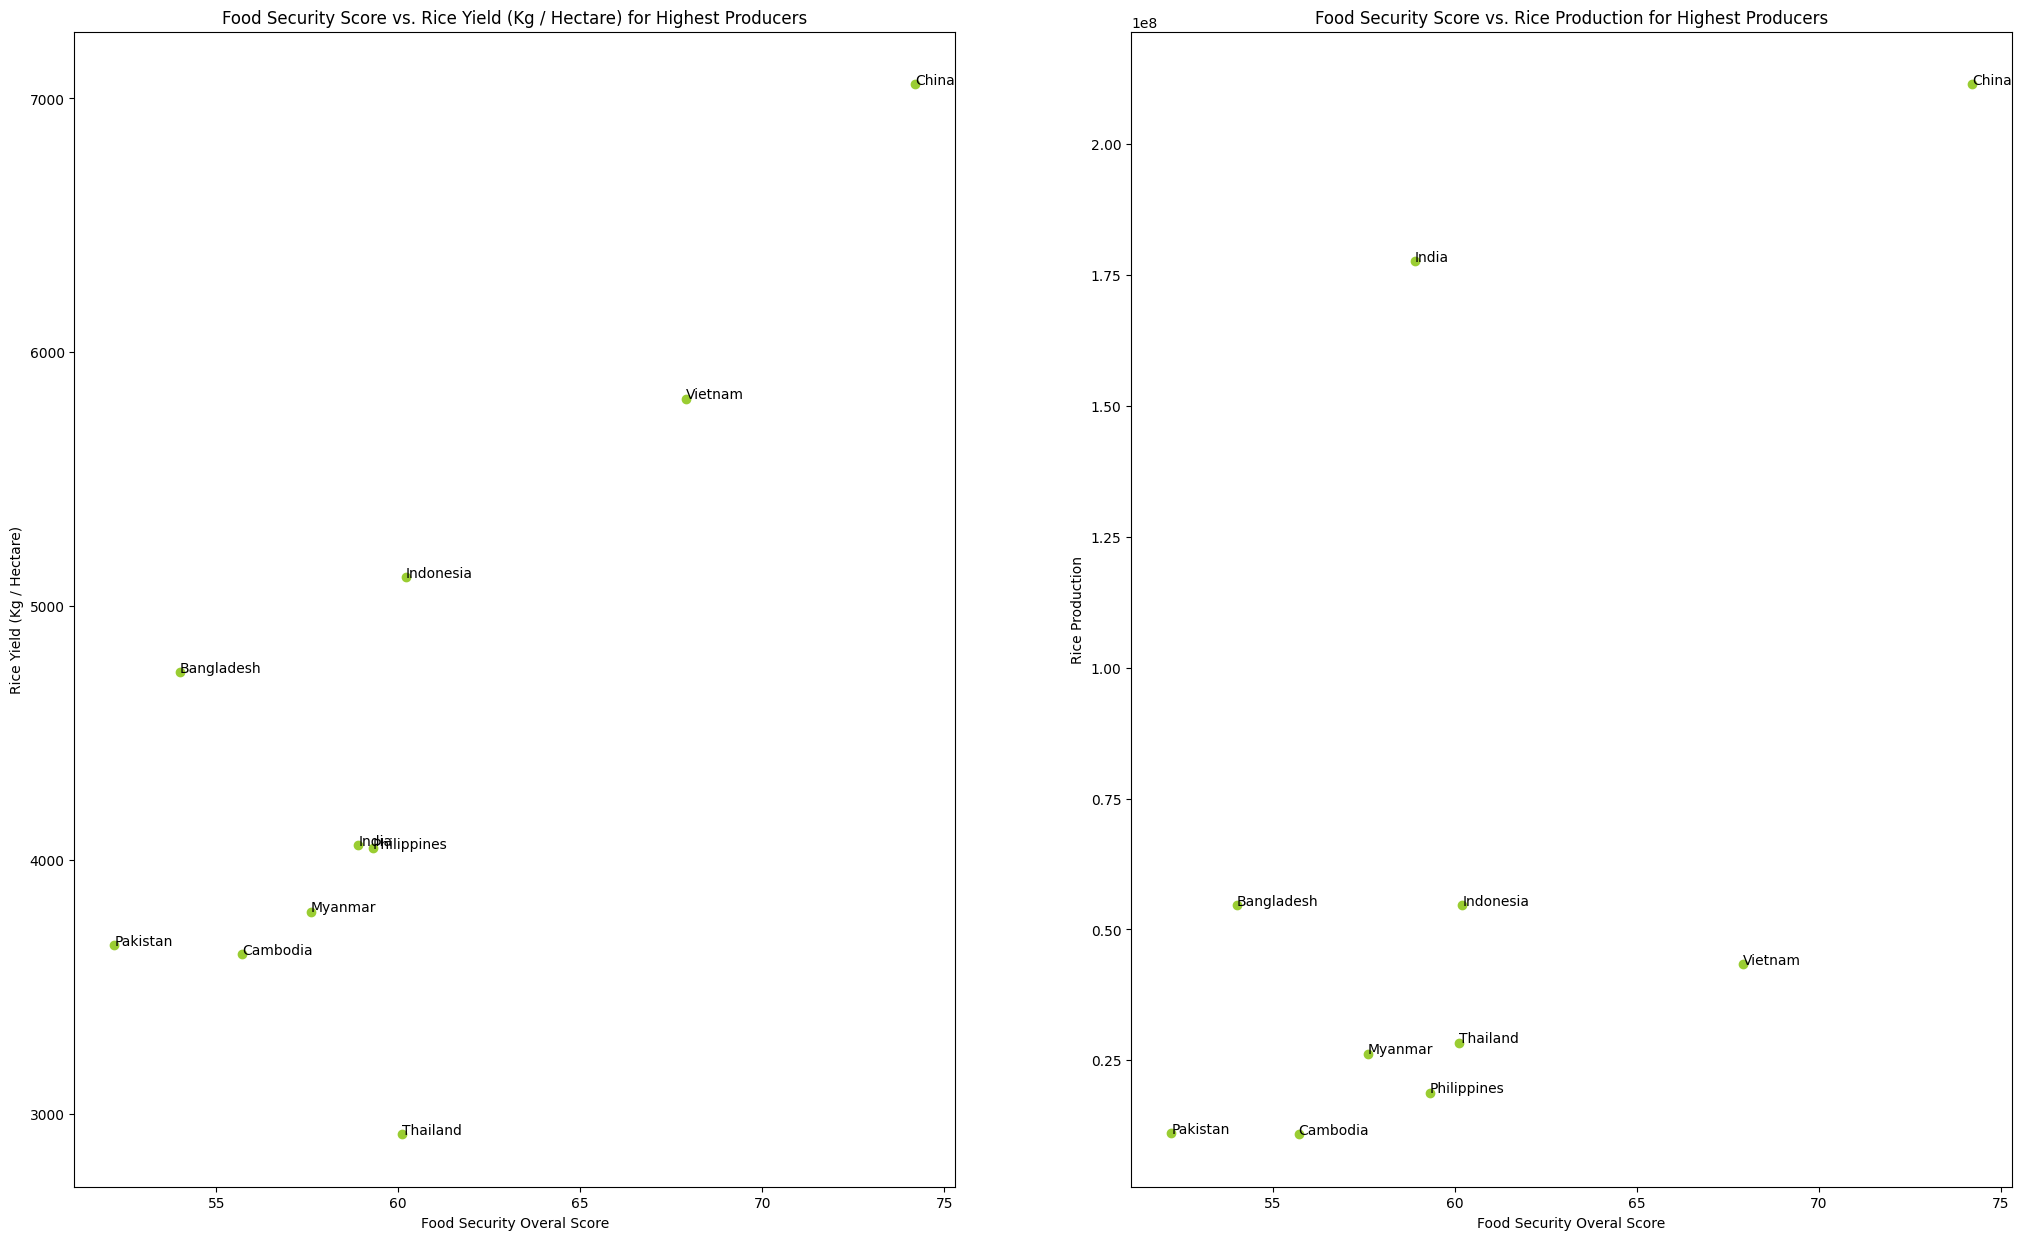

In [68]:
# We have all rows still (left join). It seems however that there is only data for a few low producing countries. 
# For now we will focus on looking at the high producers.

fig = plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(121)
ax1.scatter(x=high_rice['Overall score'], y=high_rice['Rice Yield (Kg / Hectare)'], color='yellowgreen')
ax1.set_xlabel("Food Security Overal Score")
ax1.set_ylabel("Rice Yield (Kg / Hectare)")
ax1.set_title("Food Security Score vs. Rice Yield (Kg / Hectare) for Highest Producers")               
for index, row in high_rice.iterrows():
    ax1.annotate(row['Country'], (row['Overall score'], row['Rice Yield (Kg / Hectare)']))

ax2 = fig.add_subplot(122)
ax2.scatter(x=high_rice['Overall score'], y=high_rice['rice_prod'], color='yellowgreen')
ax2.set_xlabel("Food Security Overal Score")
ax2.set_ylabel("Rice Production")
ax2.set_title("Food Security Score vs. Rice Production for Highest Producers")               
for index, row in high_rice.iterrows():
    ax2.annotate(row['Country'], (row['Overall score'], row['rice_prod']))

plt.show()

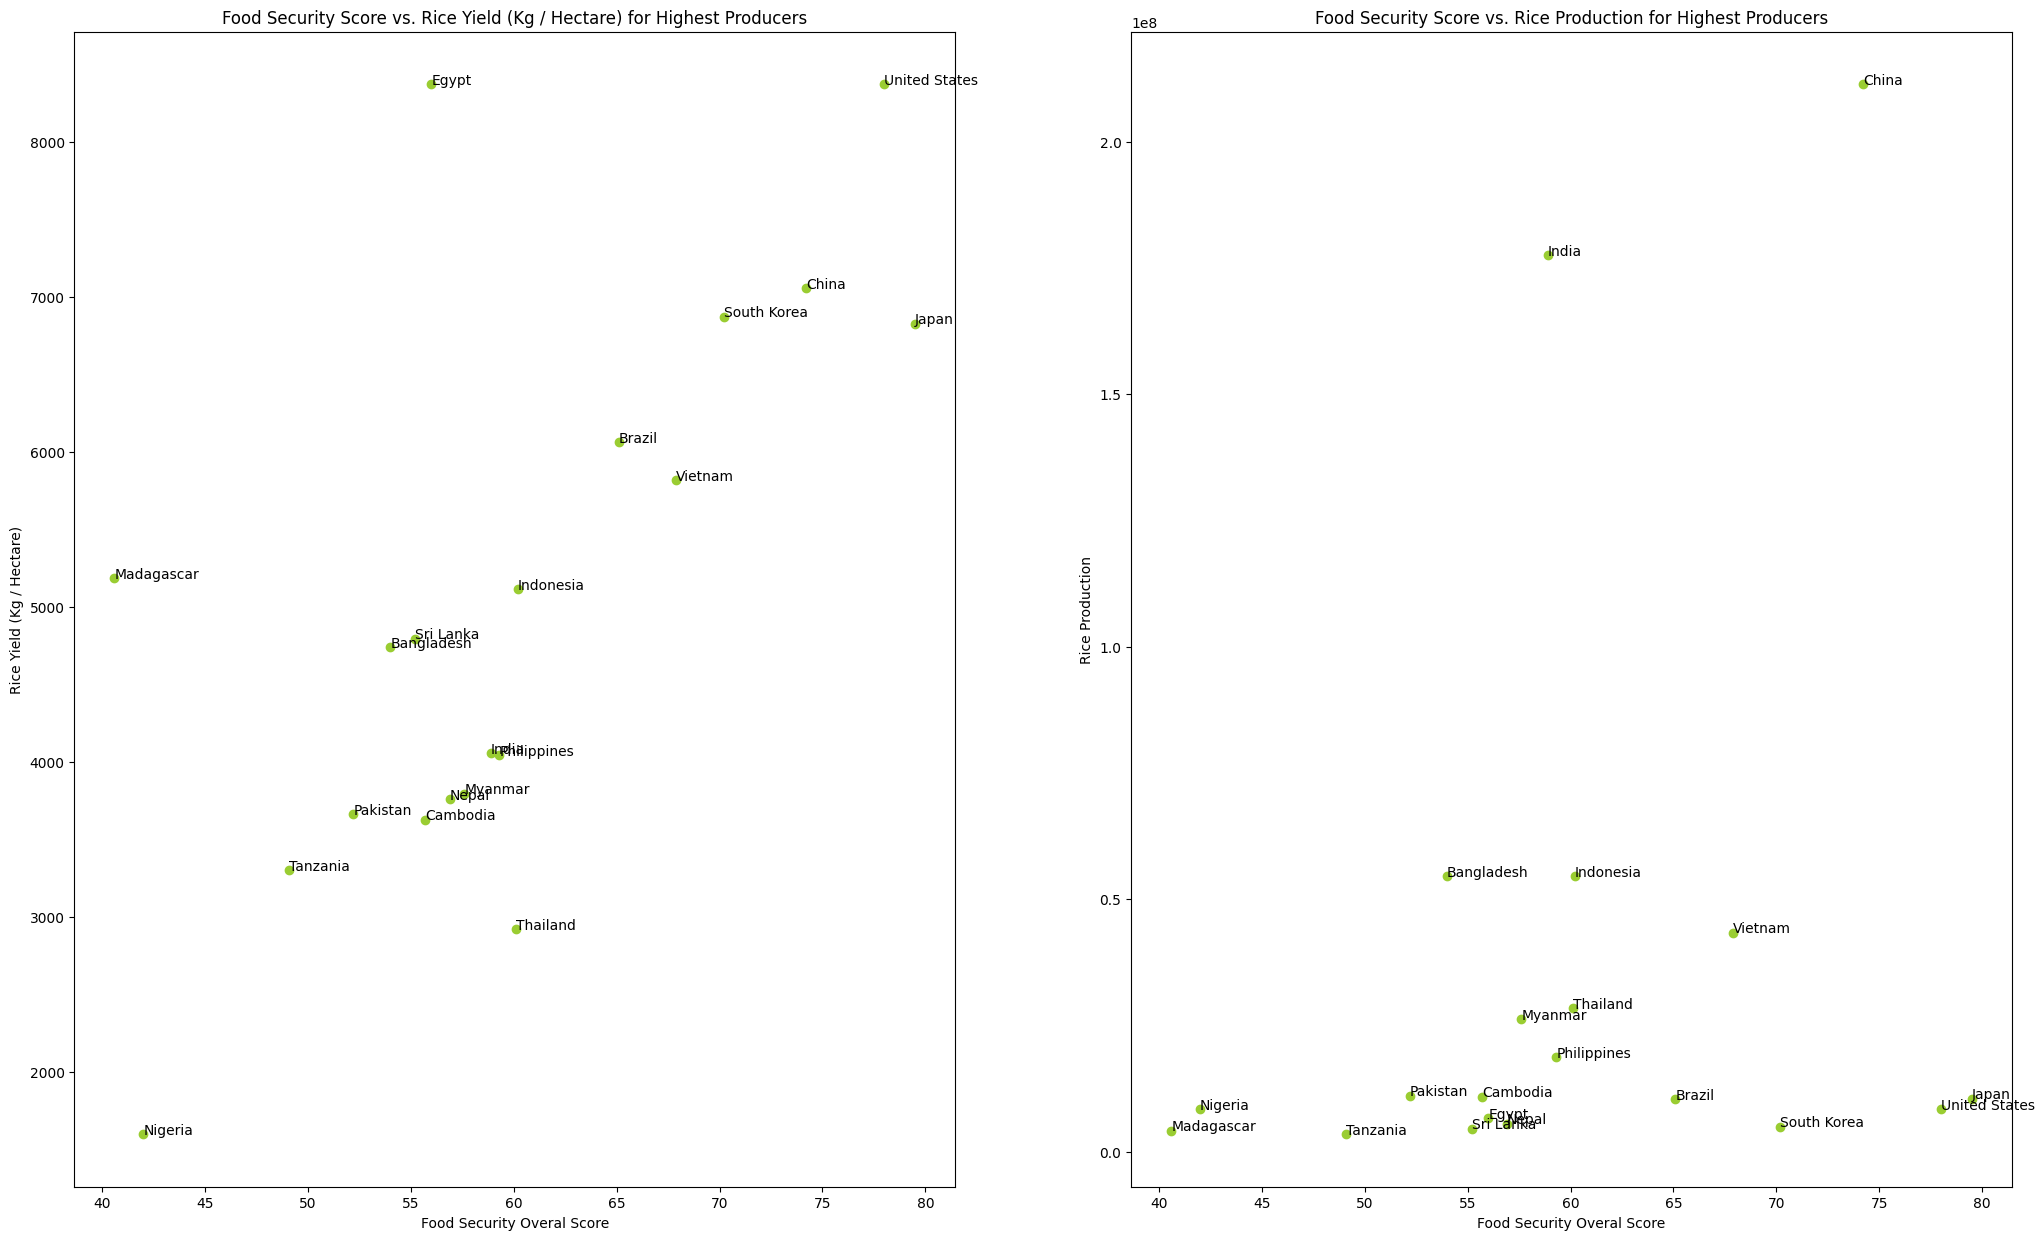

In [69]:
high_rice20 = rice_countries_fsec[rice_countries_fsec['Rank of Rice Production'] < 21] # analyse the top 10 countries
high_rice20 = high_rice20.sort_values(by='Rank of Rice Production')

fig = plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(121)
ax1.scatter(x=high_rice20['Overall score'], y=high_rice20['Rice Yield (Kg / Hectare)'], color='yellowgreen')
ax1.set_xlabel("Food Security Overal Score")
ax1.set_ylabel("Rice Yield (Kg / Hectare)")
ax1.set_title("Food Security Score vs. Rice Yield (Kg / Hectare) for Highest Producers")               
for index, row in high_rice20.iterrows():
    ax1.annotate(row['Country'], (row['Overall score'], row['Rice Yield (Kg / Hectare)']))
    
ax2 = fig.add_subplot(122)
ax2.scatter(x=high_rice20['Overall score'], y=high_rice20['rice_prod'], color='yellowgreen')
ax2.set_xlabel("Food Security Overal Score")
ax2.set_ylabel("Rice Production")
ax2.set_title("Food Security Score vs. Rice Production for Highest Producers")               
for index, row in high_rice20.iterrows():
    ax2.annotate(row['Country'], (row['Overall score'], row['rice_prod']))
plt.show()

In [70]:
fig = px.scatter(high_rice20, x="Overall score", y="Rice Yield (Kg / Hectare)", trendline="ols")
fig.show()

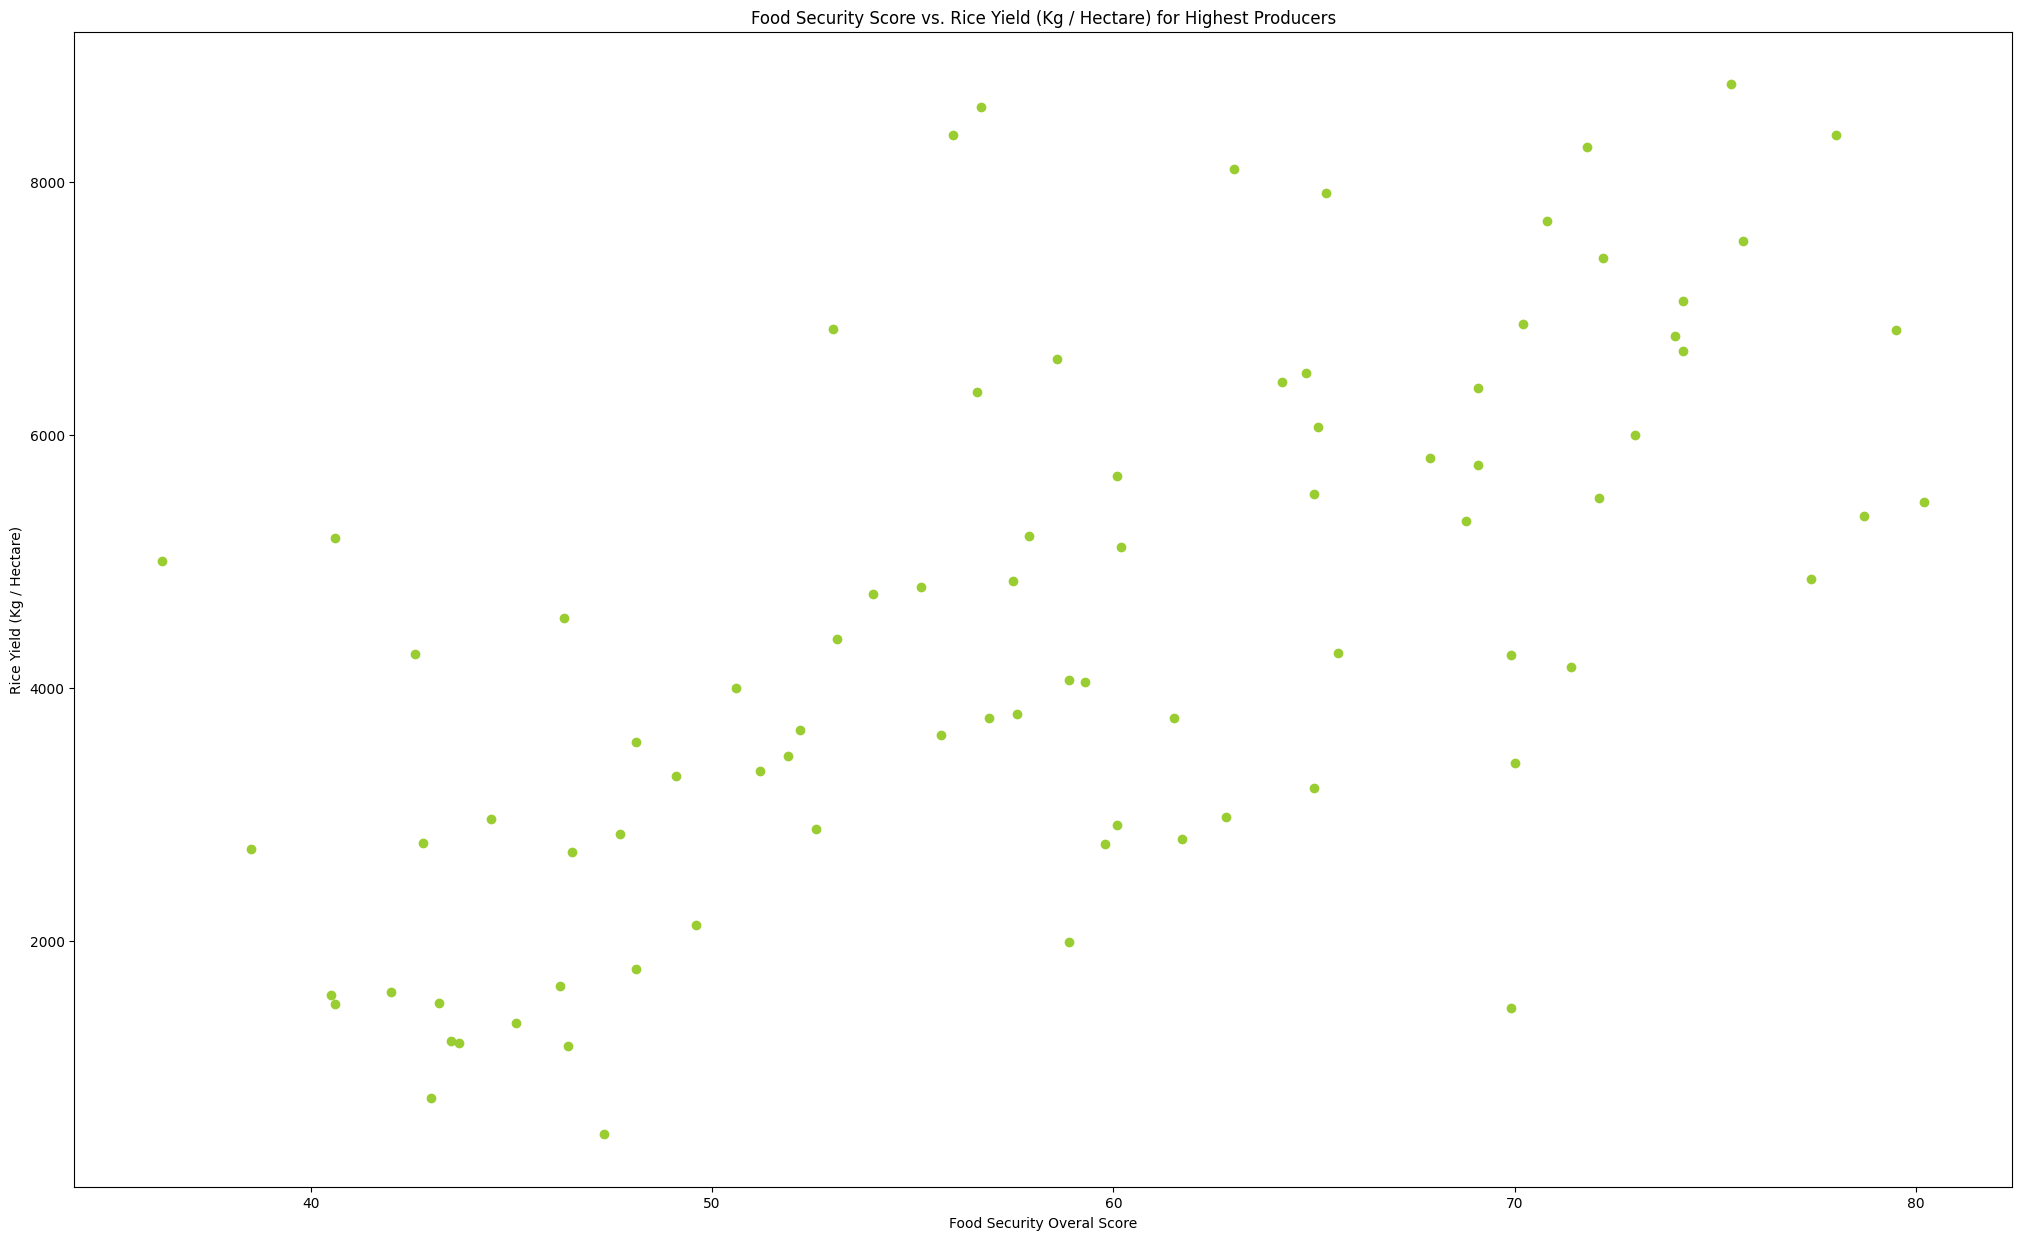

In [71]:
fig = plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(111)
ax1.scatter(x=rice_countries_fsec['Overall score'], y=rice_countries_fsec['Rice Yield (Kg / Hectare)'], color='yellowgreen')
ax1.set_xlabel("Food Security Overal Score")
ax1.set_ylabel("Rice Yield (Kg / Hectare)")
ax1.set_title("Food Security Score vs. Rice Yield (Kg / Hectare) for Highest Producers")                

plt.show()

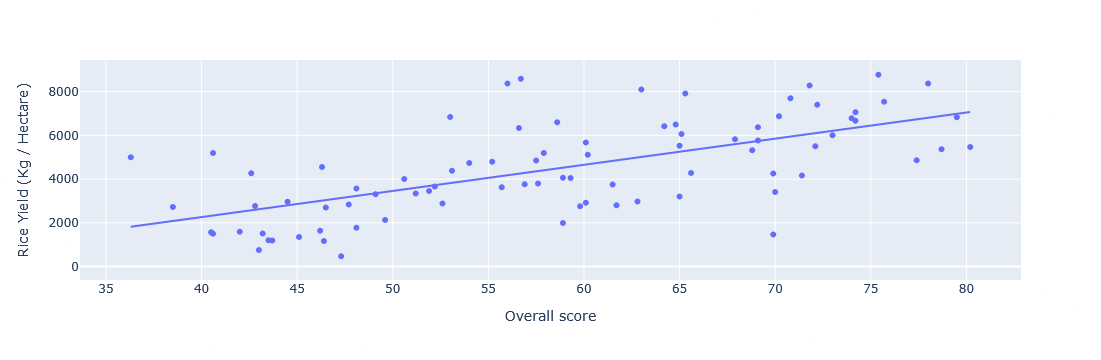

In [72]:
# whole set of rice producers
fig = px.scatter(rice_countries_fsec, x="Overall score", y="Rice Yield (Kg / Hectare)", trendline="ols")
fig.show()

In [73]:
# Since there seems to be a linear relationship between rice yield and food security score, we can use the pearson correlation to test for linearity. 
# since this doesn't work where there are missing values, we'll have to clean those 
rcf = rice_countries_fsec.dropna(subset=['Overall score', 'Rice Yield (Kg / Hectare)'])

def Pearson_correlation(X,Y):
    if len(X)==len(Y):
        Sum_xy = sum((X-X.mean())*(Y-Y.mean()))
        Sum_x_squared = sum((X-X.mean())**2)
        Sum_y_squared = sum((Y-Y.mean())**2)       
        corr = Sum_xy / np.sqrt(Sum_x_squared * Sum_y_squared)
    return corr

print(Pearson_correlation(rcf['Overall score'], rcf['Rice Yield (Kg / Hectare)']))  

0.6469053915155859


In [74]:
# it's also possible with numpy (we can use this as a test to check the function).
#print(np.corrcoef(x, y))
print(np.corrcoef(rcf['Overall score'], rcf['Rice Yield (Kg / Hectare)']))

[[1.         0.64690539]
 [0.64690539 1.        ]]


### **Conclusion - Is there a significant correlation between a country's rice yield and its overall food security?**
The correlation coefficient of 0.65 shows a strong positive relationshio between rice yield and overall food security score. It seems that the higher the yield, the higher the score. It is however unknown if this also is the case for other staples. It is possible that countries with a low rice yield, produce other carbohydrate staples. As mentioned before the top 10 rice producing countries are in Asia and are know for having rice as a carbohydrate staple.


## For countries with high rice production per capita, is food security more strongly linked to "Availability" or "Affordability"?
This question explores the internal food security dynamics of nations that produce a large amount of rice relative to their population. By focusing on countries with high "Rice Production Per Person (Kg)", we can perform a comparative analysis to see if their overall food security score is more influenced by the physical availability of food or by the economic access to it for their citizens, using the corresponding pillars from the global-food-security-index.

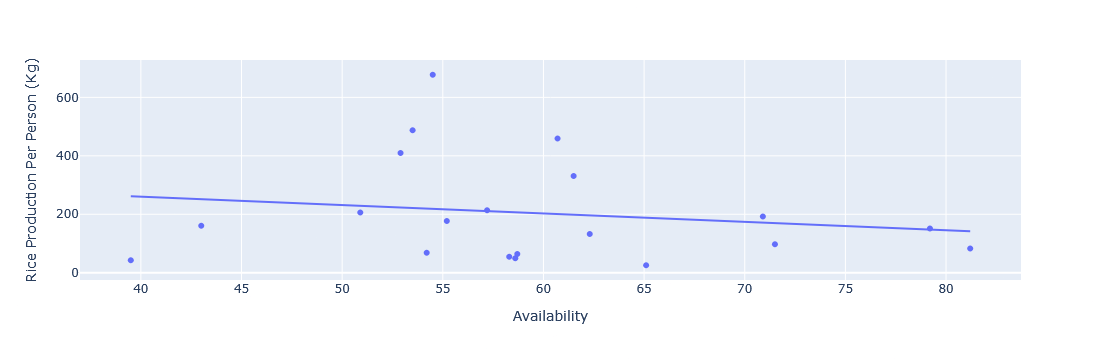

In [76]:
# We'll look at the top 20 countries for this one high_rice20
fig = px.scatter(high_rice20, x="Availability", y="Rice Production Per Person (Kg)", trendline="ols")
fig.show()

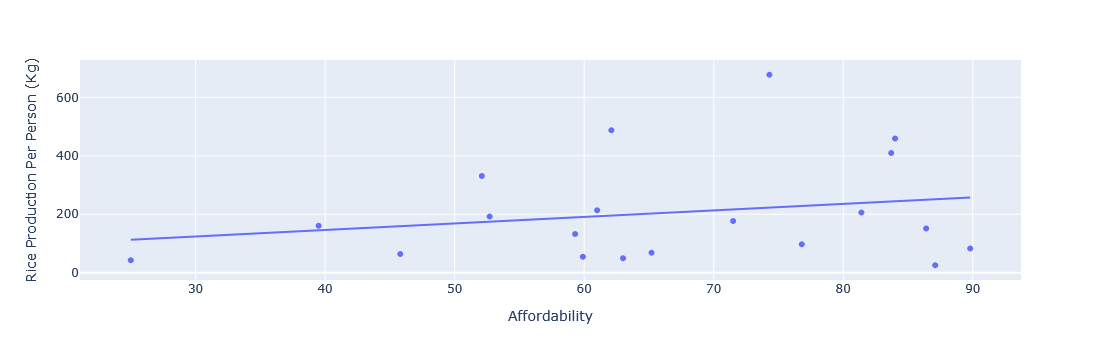

In [75]:
fig = px.scatter(high_rice20, x="Affordability", y="Rice Production Per Person (Kg)", trendline="ols")
fig.show()

In [79]:
np.corrcoef(high_rice20['Availability'], high_rice20['Rice Production Per Person (Kg)'])

array([[ 1.        , -0.16825784],
       [-0.16825784,  1.        ]])

In [78]:
np.corrcoef(high_rice20['Affordability'], high_rice20['Rice Production Per Person (Kg)'])

array([[1.        , 0.21829549],
       [0.21829549, 1.        ]])

Availability seems to have a negative correlation with production per capita, whereas affordability seems to have a positive correlation. There seems to be a slight relationship for either. 
We can check the overall relationship, not just the top 20 countries. 

In [80]:
rca = rice_countries_fsec.dropna(subset=['Affordability','Availability','Rice Production Per Person (Kg)'])

np.corrcoef(rca['Availability'], rca['Rice Production Per Person (Kg)'])

array([[1.        , 0.04656051],
       [0.04656051, 1.        ]])

In [81]:
np.corrcoef(rca['Affordability'], rca['Rice Production Per Person (Kg)'])

array([[1.       , 0.1259003],
       [0.1259003, 1.       ]])

### **Conclusion - For countries with high rice production per capita, is food security more strongly linked to "Availability" or "Affordability"?**
There seems to be a slightly negative correlation between availability and rice production per person for the top 20 countries. However if we look at the correlation for all rice producing countries, there is barely any (pearson coeff 0.047). 
There is a slight positive relationship between rice production per kg and affordability, coef 0.219. For all countries it's 0.126. It's not a very strong relationship.

Many of the top 20 countries are Asian, where affordability is plays a huge factor for staple food.